In [770]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [771]:
from museotoolbox.ai import SuperLearner
from museotoolbox.cross_validation import RandomStratifiedKFold
from museotoolbox.charts import PlotConfusionMatrix
from museotoolbox import datasets
from sklearn.ensemble import RandomForestClassifier

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from mlxtend.evaluate import accuracy_score
from sklearn.metrics import balanced_accuracy_score


from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score


In [773]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [774]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [775]:
from sklearn.decomposition import PCA

# Read the data 

In [776]:
df = pd.read_csv('Data_feature_selection.csv', sep = ',')
df.head()

name  Permeability coefficient  \
0           Cefacetrile                       100   
1  7-alfa-H-cefmetazole                        82   
2             Cefazolin                        77   
3           Cefmetazole                        65   
4             Cefoxitin                        46   

                                    Canonical SMILES  glide rotatable bonds  \
0   CC(OCC1=C(C([O-])=O)N2C(SC1)C(NC(CC#N)=O)C2=O)=O              -0.380696   
1  CN1C(SCC2=C(C([O-])=O)N3C(SC2)C(NC(CSCC#N)=O)(...               0.699657   
2  CC1=NN=C(SCC2=C(C([O-])=O)N3C(SC2)C(NC(CN4C=NN...              -0.020578   
3  CN1C(SCC2=C(C([O-])=O)N3C(SC2)C(NC(CSCC#N)=O)(...               0.699657   
4  COC1(NC(CC2=CC=CS2)=O)C3N(C(C([O-])=O)=C(COC(N...               0.339539   

   docking score  glide ligand efficiency  glide ligand efficiency sa  \
0      -1.112191                -1.671079                   -1.697668   
1       0.654649                 0.628916                    0.677771   
2      -0.802970                -0.288606                   -0.463064   
3       0.654649                 0.628916                    0.677771   
4      -0.661648                -0.368550                   -0.499041   

   glide ligand efficiency ln  glide gscore  glide lipo  ...  \
0                   -1.473282     -1.112191    0.998226  ...   
1                    0.715449      0.654649    0.656269  ...   
2                   -0.723032     -0.802970   -0.793672  ...   
3                    0.715449      0.654649    0.656269  ...   
4                   -0.650898     -0.661648   -3.163162  ...   

   A:80(LYS) HAccep cn  A:82(ARG) HAccep cc  A:82(ARG) HAccep cn  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    0   

   A:82(ARG) HAccep nn  A:82(ARG) HAccep nc  A:82(ARG) Salt  Charge_+ - -  \
0                    1                    0               0             0   
1                    0                    0               0             0   
2                    1                    0               0             0   
3                    0                    0               0             0   
4                    0                    1               1             0   

   Charge_-  Charge_- -   Charge_±  
0         1            0         0  
1         1            0         0  
2         1            0         0  
3         1            0         0  
4         1            0         0  

[5 rows x 78 columns]

<Axes: ylabel='Frequency'>

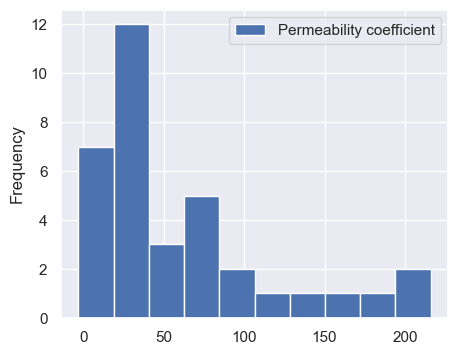

In [777]:
ax = df.plot.hist(column=["Permeability coefficient"], figsize=(5, 4))
ax

In [778]:
#new column for classification model
df['Permiation'] = [0 if 0 < x <=100  else 1 for x in df['Permeability coefficient']]

In [779]:
df.shape

(35, 79)

# Heatmap

In [780]:
corr_matrix = df.drop(['Canonical SMILES', 'name', 'Permiation'], axis= 1).corr()


corr_matrix_1 = corr_matrix.rename_axis('Feature').reset_index()
corr_matrix_1

Feature  Permeability coefficient  \
0     Permeability coefficient                  1.000000   
1        glide rotatable bonds                 -0.494454   
2                docking score                 -0.065239   
3      glide ligand efficiency                 -0.584479   
4   glide ligand efficiency sa                 -0.504461   
..                         ...                       ...   
71              A:82(ARG) Salt                 -0.021112   
72                Charge_+ - -                 -0.203611   
73                    Charge_-                 -0.024478   
74                 Charge_- -                  -0.318192   
75                    Charge_±                  0.487964   

    glide rotatable bonds  docking score  glide ligand efficiency  \
0               -0.494454      -0.065239                -0.584479   
1                1.000000      -0.079709                 0.586251   
2               -0.079709       1.000000                 0.537591   
3                0.586251       0.537591                 1.000000   
4                0.481265       0.697295                 0.978581   
..                    ...            ...                      ...   
71               0.154306       0.129787                 0.042855   
72               0.478442       0.097291                 0.334167   
73              -0.080195       0.051100                 0.013720   
74              -0.008401       0.252294                 0.273695   
75              -0.354242      -0.363144                -0.562569   

    glide ligand efficiency sa  glide ligand efficiency ln  glide gscore  \
0                    -0.504461                   -0.269319     -0.065239   
1                     0.481265                    0.170529     -0.079709   
2                     0.697295                    0.944742      1.000000   
3                     0.978581                    0.783521      0.537591   
4                     1.000000                    0.893645      0.697295   
..                         ...                         ...           ...   
71                    0.060253                    0.106796      0.129787   
72                    0.311232                    0.204188      0.097291   
73                    0.025568                    0.043968      0.051100   
74                    0.292375                    0.291325      0.252294   
75                   -0.570252                   -0.489093     -0.363144   

    glide lipo  glide hbond  ...  A:80(LYS) HAccep cn  A:82(ARG) HAccep cc  \
0    -0.167354     0.515097  ...             0.033352             0.033352   
1    -0.028322    -0.665997  ...             0.181750             0.181750   
2    -0.160000     0.277780  ...             0.030297             0.030297   
3    -0.014382    -0.302668  ...            -0.007505            -0.007505   
4    -0.052190    -0.180722  ...            -0.003087            -0.003087   
..         ...          ...  ...                  ...                  ...   
71   -0.650824    -0.200575  ...             0.477432             0.477432   
72    0.132831    -0.461699  ...             0.342997             0.342997   
73   -0.235511     0.160964  ...            -0.148522            -0.148522   
74    0.167720    -0.115966  ...            -0.070014            -0.070014   
75    0.011253     0.346746  ...            -0.093352            -0.093352   

    A:82(ARG) HAccep cn  A:82(ARG) HAccep nn  A:82(ARG) HAccep nc  \
0             -0.092564            -0.376410            -0.043842   
1             -0.213405            -0.038613             0.067208   
2             -0.200625            -0.256631             0.129475   
3             -0.102604             0.041959             0.053172   
4             -0.143738            -0.023642             0.070316   
..                  ...                  ...                  ...   
71            -0.243187            -0.311086             0.852386   
72            -0.184637            -0.144338            -0.153093   
73

In [781]:
correlation_data = pd.DataFrame(columns = ['Feature1', 'Feature2', 'Correlation coefficient'])
properties = corr_matrix_1.columns.tolist()

for feach1 in corr_matrix_1.index:
    for feach2 in properties[1:]:
        corr_coef = corr_matrix_1.loc[feach1, feach2]
        if 0.9 < corr_coef or corr_coef < -0.9:
            if corr_matrix_1.loc[feach1, 'Feature'] != feach2:
                #correlation_data = correlation_data.append({'Feature1' : corr_matrix_1.loc[feach1, 'Feature'], 
                # 'Feature2' : feach2, 'Correlation coefficient' : corr_coef}, ignore_index = True)
                new_row = pd.DataFrame({'Feature1' : corr_matrix_1.loc[feach1, 'Feature'], 
                                       'Feature2' : feach2, 
                                       'Correlation coefficient' : corr_coef}, 
                                       index=[0])
                correlation_data = pd.concat([new_row,correlation_data.loc[:]]).reset_index(drop=True)
    
for index_cor in correlation_data.index:
    features = correlation_data.loc[index_cor, :].tolist()
    for index_corr_1 in correlation_data.index:
        features_2 = correlation_data.loc[index_corr_1, :].tolist()
        if features != features_2 and features_2[0] == features[1] and features_2[1] == features[0]:
            #print(features)
            #print('NEW',  features_2)
            #print('STOP')
            #print(index_cor,index_corr_1)
            correlation_data.drop(labels=index_cor, axis=0, inplace=True)

In [782]:
correlation_data

Feature1                    Feature2  \
3           A:80(LYS) HAccep cn         A:82(ARG) HAccep cc   
7           A:42(ARG) HAccep cc              A:42(ARG) Salt   
8               A:38(MET) HPhob         A:82(ARG) HAccep cc   
9               A:38(MET) HPhob         A:80(LYS) HAccep cn   
11         A:113(ASP) HDonor cc         A:82(ARG) HAccep cc   
..                          ...                         ...   
115                glide emodel                glide energy   
118  glide ligand efficiency ln                glide gscore   
121     glide ligand efficiency  glide ligand efficiency sa   
122               docking score                glide gscore   
123               docking score  glide ligand efficiency ln   

     Correlation coefficient  
3                   1.000000  
7                   1.000000  
8                   1.000000  
9                   1.000000  
11                  1.000000  
..                       ...  
115                 0.929185  
118                 0.944742  
121                 0.978581  
122                 1.000000  
123                 0.944742  

[62 rows x 3 columns]

In [783]:
feach1_list = correlation_data['Feature1'].unique().tolist()
for item in correlation_data['Feature2'].unique().tolist():
    if item not in feach1_list:
        feach1_list.append(item)

print('Number of correlated features ', len(feach1_list))

Number of correlated features  25


In [873]:
feach1_list

['A:80(LYS) HAccep cn',
 'A:42(ARG) HAccep cc',
 'A:38(MET) HPhob',
 'A:113(ASP) HDonor cc',
 'res:A16 coul',
 'res:A42 Eint',
 'res:A42 coul',
 'res:A82 Eint',
 'res:A82 coul',
 'res:A113 Eint',
 'res:A113 coul',
 'res:A117 Eint',
 'res:A117 coul',
 'res:A132 Eint',
 'res:A132 coul',
 'glide emodel',
 'glide ligand efficiency ln',
 'glide ligand efficiency',
 'docking score',
 'A:82(ARG) HAccep cc',
 'A:42(ARG) Salt',
 'res:A16 Eint',
 'glide energy',
 'glide gscore',
 'glide ligand efficiency sa']

In [784]:
corr_matrix_set = df.drop(['Canonical SMILES', 'name', 'Permiation'], axis= 1)[feach1_list].corr()

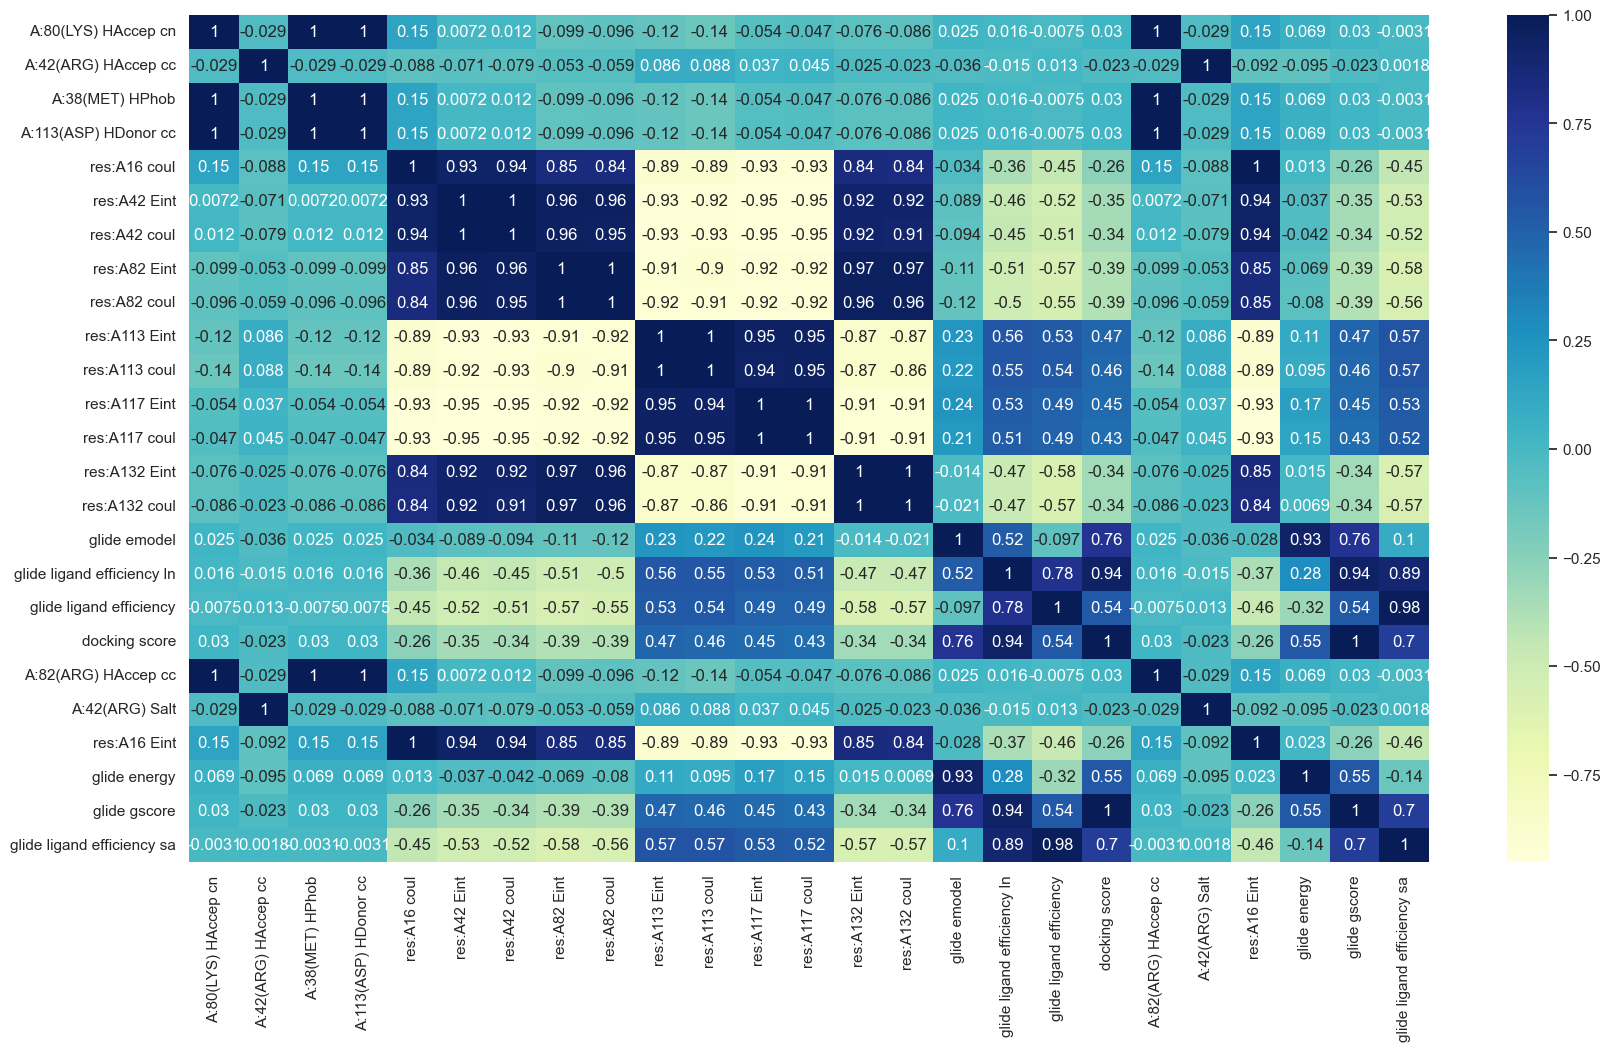

In [785]:
plt.rcParams["figure.figsize"] = [20,11]
dataplot = sns.heatmap(corr_matrix_set, cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [786]:
deleted_features = []
saved_features = []
deleted_indexes = []

for index_f in correlation_data.index:
    #print(index_f)
    if index_f not in deleted_indexes:
        feature1 = correlation_data.loc[index_f, 'Feature1']
        feature2 = correlation_data.loc[index_f, 'Feature2']
        #print('Feature1: ',feature1)
        #print('Feature2: ',feature2)
        if feature2 not in deleted_features: 
            deleted_features.append(feature2)

        other_feach_list = correlation_data['Feature2'].tolist()[1:]
        #print(other_feach_list)
        correlation_data.drop(labels=index_f, axis=0, inplace=True)
        deleted_indexes.append(index_f)

        if feature1 in other_feach_list:
            #print('yes: feature is repeated')
            while (feature1 in other_feach_list): 
                ind = correlation_data[correlation_data['Feature2'] == feature1].index[0]
                #print(ind)
                if feature1 not in deleted_features: 
                    deleted_features.append(feature1)
                feature1 = correlation_data.loc[ind, 'Feature1']
                #print('New feature1: ', feature1)
                correlation_data.drop(labels=ind, axis=0, inplace=True)
                deleted_indexes.append(ind)

            if feature1 not in saved_features:
                saved_features.append(feature1)
        
        else:
            if feature1 not in deleted_features and feature1 not in saved_features:
                saved_features.append(feature1)

        #print('SAVED FEATURES', saved_features)
        #print('DELETED FEATURES', deleted_features)
        #print('DELETED INDEXES', deleted_indexes)


In [787]:
print('SAVED FEATURES' , len(saved_features), saved_features)
print('DELETED FEATURES', len(deleted_features), deleted_features)

SAVED FEATURES 8 ['A:113(ASP) HDonor cc', 'A:42(ARG) HAccep cc', 'res:A132 coul', 'res:A132 Eint', 'res:A117 coul', 'glide emodel', 'docking score', 'glide ligand efficiency']
DELETED FEATURES 19 ['A:82(ARG) HAccep cc', 'A:80(LYS) HAccep cn', 'A:38(MET) HPhob', 'A:42(ARG) Salt', 'res:A16 Eint', 'res:A16 coul', 'res:A42 Eint', 'res:A42 coul', 'res:A82 Eint', 'res:A82 coul', 'res:A113 Eint', 'res:A113 coul', 'res:A117 Eint', 'res:A117 coul', 'res:A132 Eint', 'glide energy', 'glide gscore', 'glide ligand efficiency ln', 'glide ligand efficiency sa']


# Data with features after checking correlation

In [788]:
df_heatmap = df.drop(deleted_features, axis= 1)
df_heatmap.head()

name  Permeability coefficient  \
0           Cefacetrile                       100   
1  7-alfa-H-cefmetazole                        82   
2             Cefazolin                        77   
3           Cefmetazole                        65   
4             Cefoxitin                        46   

                                    Canonical SMILES  glide rotatable bonds  \
0   CC(OCC1=C(C([O-])=O)N2C(SC1)C(NC(CC#N)=O)C2=O)=O              -0.380696   
1  CN1C(SCC2=C(C([O-])=O)N3C(SC2)C(NC(CSCC#N)=O)(...               0.699657   
2  CC1=NN=C(SCC2=C(C([O-])=O)N3C(SC2)C(NC(CN4C=NN...              -0.020578   
3  CN1C(SCC2=C(C([O-])=O)N3C(SC2)C(NC(CSCC#N)=O)(...               0.699657   
4  COC1(NC(CC2=CC=CS2)=O)C3N(C(C([O-])=O)=C(COC(N...               0.339539   

   docking score  glide ligand efficiency  glide lipo  glide hbond  \
0      -1.112191                -1.671079    0.998226    -0.899025   
1       0.654649                 0.628916    0.656269     0.594351   
2      -0.802970                -0.288606   -0.793672    -0.037920   
3       0.654649                 0.628916    0.656269     0.594351   
4      -0.661648                -0.368550   -3.163162    -0.784755   

   glide rewards  glide evdw  ...  A:42(ARG) HAccep nc  A:82(ARG) HAccep cn  \
0      -1.163772    0.485482  ...                    0                    1   
1       0.480275   -0.280799  ...                    0                    0   
2       0.276023   -1.233351  ...                    0                    1   
3       0.480275   -0.280799  ...                    0                    0   
4       0.120656   -0.617494  ...                    0                    0   

   A:82(ARG) HAccep nn  A:82(ARG) HAccep nc  A:82(ARG) Salt  Charge_+ - -  \
0                    1                    0               0             0   
1                    0                    0               0             0   
2                    1                    0               0             0   
3                    0                    0               0             0   
4                    0                    1               1             0   

   Charge_-  Charge_- -   Charge_±  Permiation  
0         1            0         0           0  
1         1            0         0           0  
2         1            0         0           0  
3         1            0         0           0  
4         1            0         0           0  

[5 rows x 60 columns]

In [789]:
#selected features after heatmap

heatmap_features = df_heatmap.drop(['name', 'Permeability coefficient', 'Canonical SMILES','Permiation'], axis = 1).columns.tolist()

# PCA

In [790]:
list_PCA= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

In [791]:
def PCA_function(components_number, data):

    pca = PCA(n_components=components_number)
    pca_features = pca.fit_transform(data)
    
    print('Shape before PCA: ', data.shape)
    print('Shape after PCA: ', pca_features.shape)


    list_PCA = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
    pca_df = pd.DataFrame( 
        data=pca_features, 
        columns=list_PCA[:components_number])

    #plot
    #fig, ax = plt.subplots(figsize = (5,5))
    #sns.set()

    #plt.bar(range(1,len(pca.explained_variance_)+1),
    #pca.explained_variance_)

    #plt.bar(range(0,len(pca.explained_variance_)), pca.explained_variance_, alpha=0.5, align='center', label='Individual explained variance')
 
 
    #plt.xlabel('PCA Feature')
    #plt.ylabel('Explained variance')
    #plt.title('Feature Explained Variance')
    #plt.show()

    pca_df['Permiation'] = df['Permiation']

    #fig = px.scatter(pca_features, x=0, y=1, color=pca_df['Permiation'])
    #fig.show()

    sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='Permiation', fit_reg=False, legend=True)
    plt.title('2D PCA Graph')
    plt.show()

    # Principal components correlation coefficients
    loadings = pca.components_
 
    # Number of features before PCA
    n_features = pca.n_features_in_
 
    # Feature names before PCA
    feature_names = data.columns.tolist()  

    # Principal components correlation coefficients
    loadings = pca.components_
 
    # PC names
    pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
    # Match PC names to loadings
    pc_loadings = dict(zip(pc_list, loadings))
 
    # Matrix of corr coefs between feature names and PCs
    loadings_df = pd.DataFrame.from_dict(pc_loadings)
    loadings_df['feature_names'] = feature_names
    loadings_df = loadings_df.set_index('feature_names')

    # Get the loadings of x and y axes
    xs = loadings[0]
    ys = loadings[1]
 
    # Plot the loadings on a scatterplot
    for i, varnames in enumerate(feature_names):
        plt.scatter(xs[i], ys[i], s=200)
        plt.text(xs[i], ys[i], varnames)
 
    # Define the axes
    xticks = np.linspace(-0.3, 0.3, num=5)
    yticks = np.linspace(-0.3, 0.4, num=5)
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
 
    # Show plot
    plt.title('2D Loading plot')
    plt.show()
    

Shape before PCA:  (35, 75)
Shape after PCA:  (35, 5)


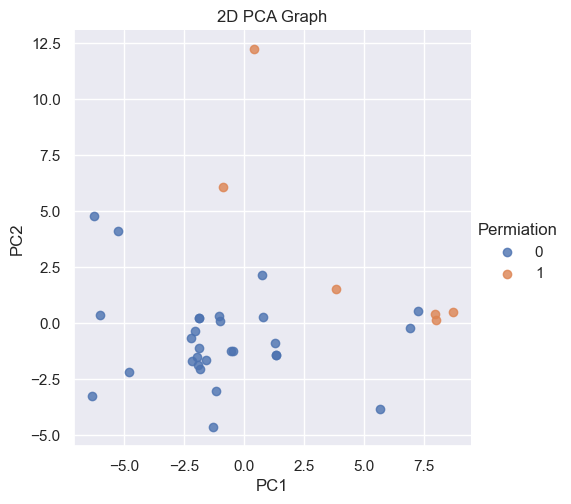

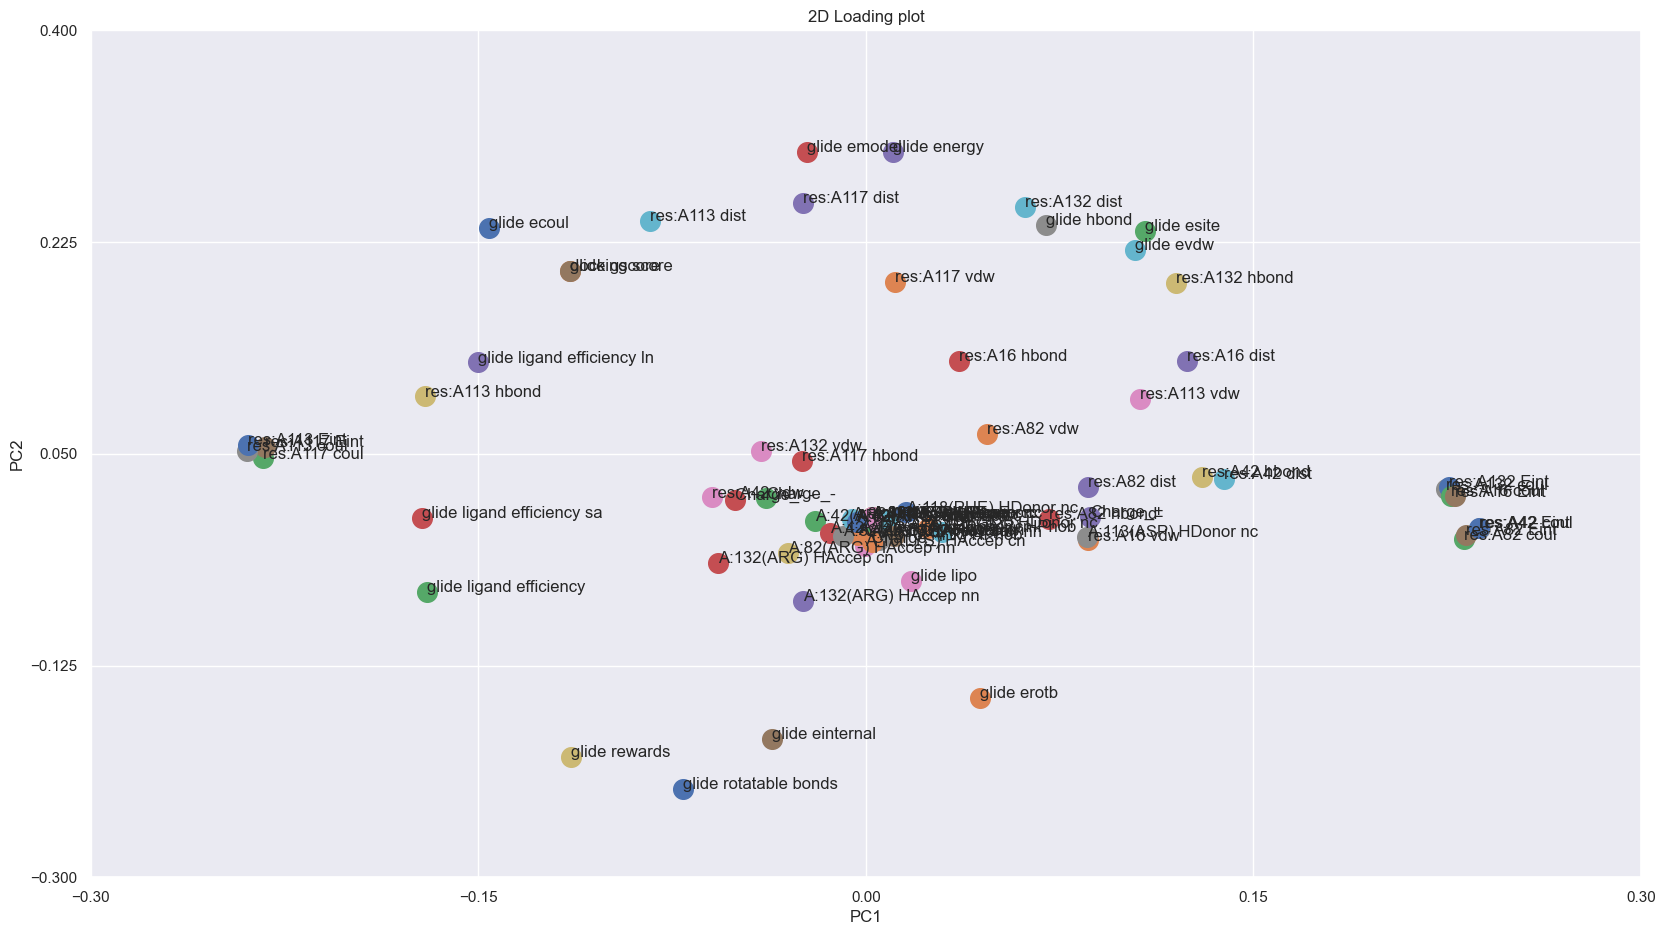

In [792]:
PCA_function(5, df.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1))

Shape before PCA:  (35, 56)
Shape after PCA:  (35, 5)


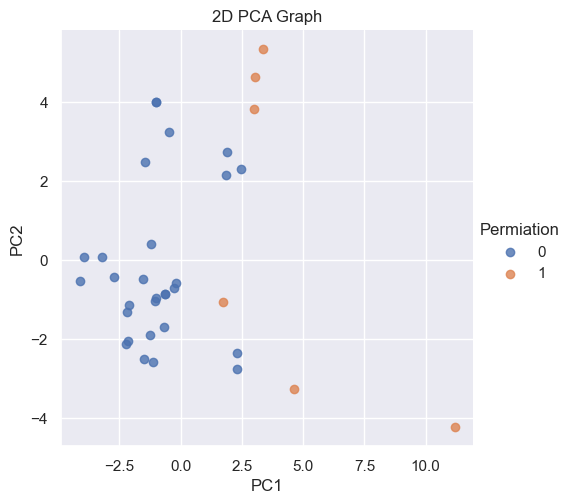

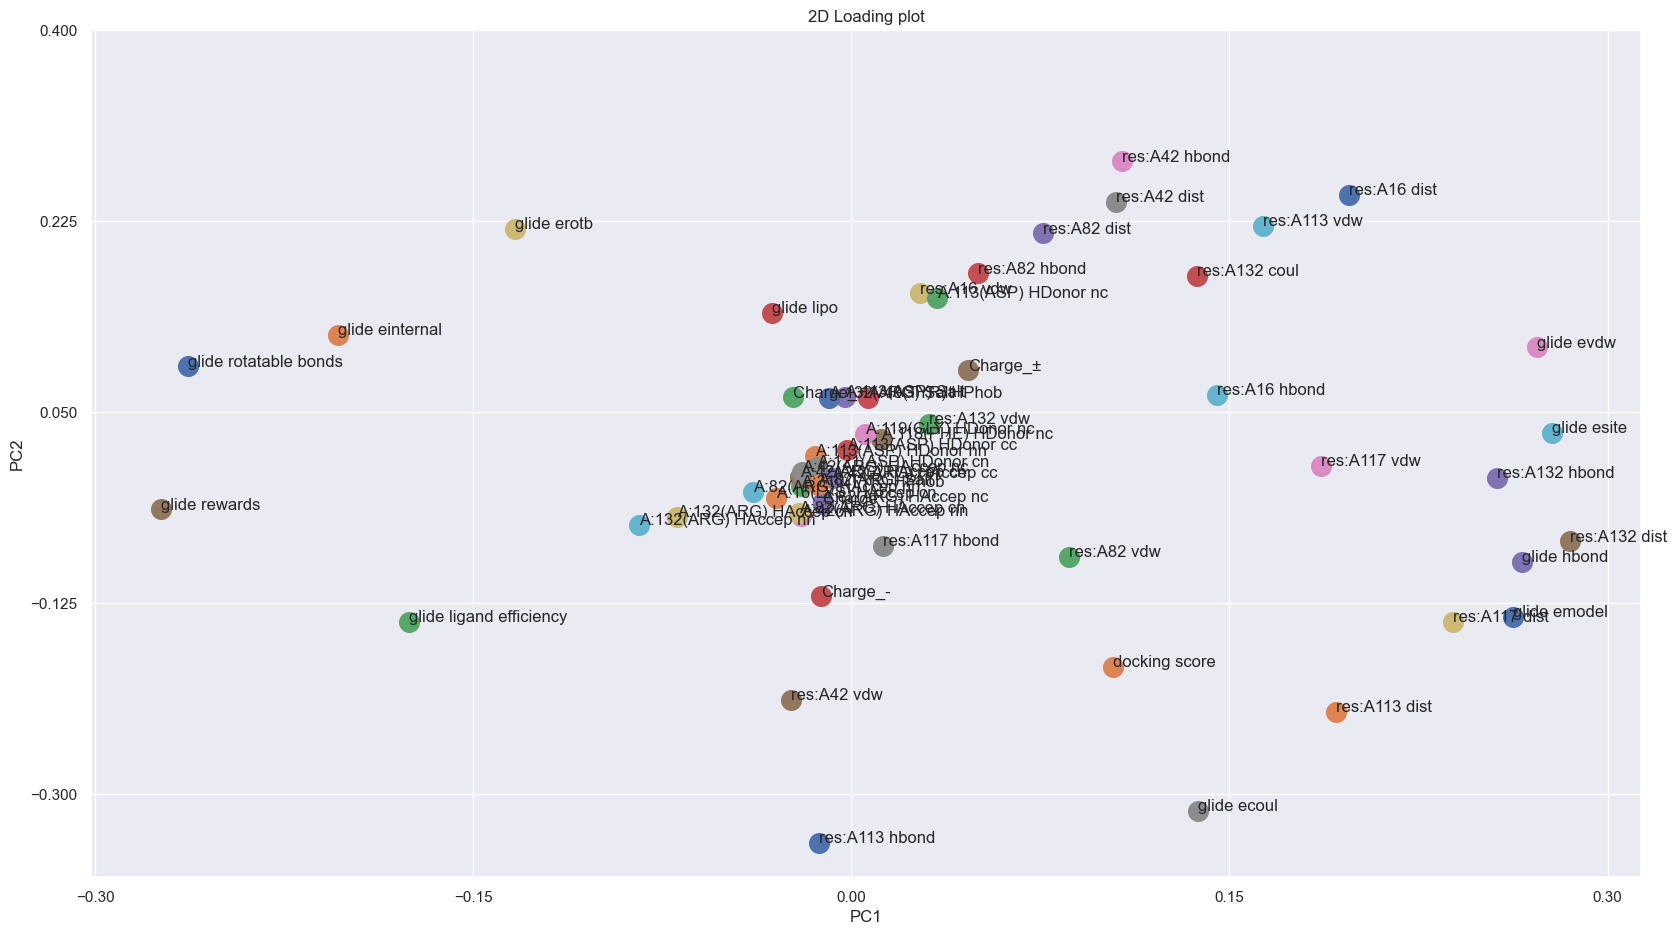

In [793]:
PCA_function(5, df_heatmap.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1))

# Feature selection based on PCA

Shape before PCA:  (35, 56)
Shape after PCA:  (35, 2)


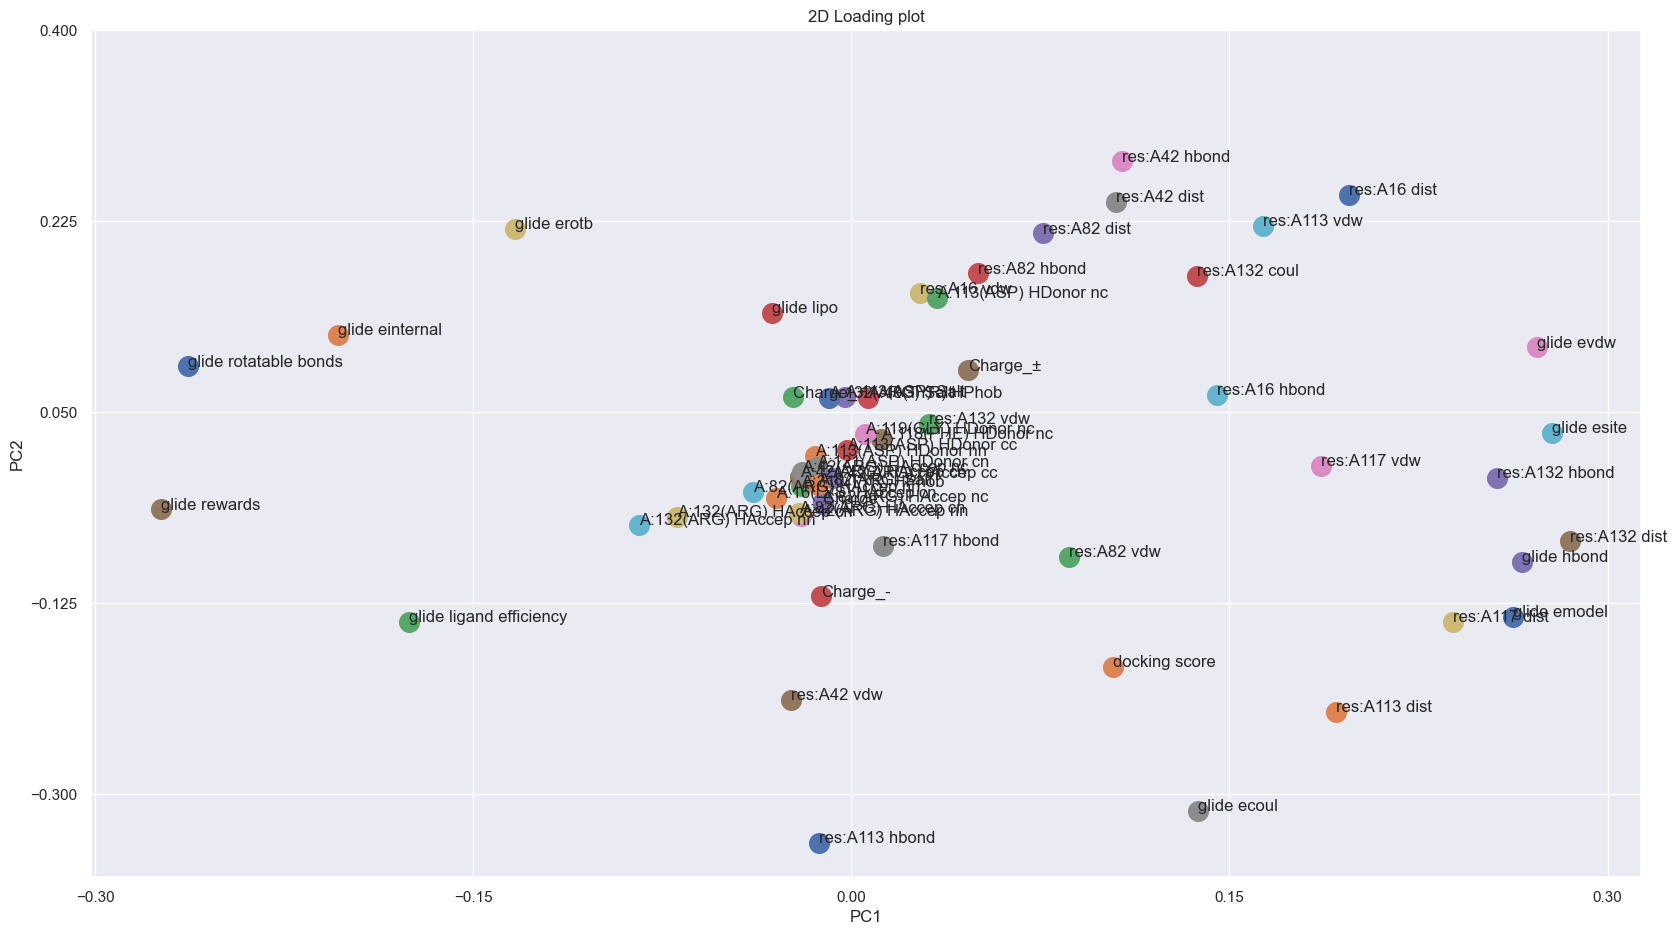

In [794]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_heatmap.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1))
    
print('Shape before PCA: ', df_heatmap.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1).shape)
print('Shape after PCA: ', pca_features.shape)


list_PCA = ['PC1', 'PC2']
pca_df = pd.DataFrame( 
    data=pca_features, 
    columns=list_PCA[:2])


pca_df['Permiation'] = df['Permiation']

# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = df_heatmap.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1).columns.tolist()  

# Principal components correlation coefficients
loadings = pca.components_
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.3, 0.3, num=5)
yticks = np.linspace(-0.3, 0.4, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

In [795]:
ppp = loadings_df.query("PC1 >=  - 0.005 & PC1 <= 0.01")
#ppp.query("PC2 >=  - 0.05 & PC2 <= 0.05")
ppp

PC1       PC2
feature_names                           
A:113(ASP) HDonor cc -0.001642  0.015418
A:113(ASP) Salt      -0.002321  0.063787
A:119(GLY) HDonor nc  0.005362  0.030008
A:40(TYR) HPhob       0.006748  0.063247

# Train/test split 

In [796]:
#regression model

X_reg = df.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1)
Y_reg = df['Permeability coefficient']

### For regression check filter methods like

* correlation with target
* pairwise correlation

In [797]:
#classification model

X_class = df.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1)
Y_class = df['Permiation']

# Classifiers

In [798]:
models = [['SVM', svm.SVC()], 
          ['Random Forest', RandomForestClassifier(random_state=42)], 
          ['Decision Tree', DecisionTreeClassifier(random_state=42)], 
          ['KNeighbors', KNeighborsClassifier()],
          ['LogisticRegression', LogisticRegression(random_state=42)]
          ]

# Confusion matrix analysis

In [799]:
def confusion_matrix_function(XXX, yyy, selected_features_mod, test_size):
    dict_test_train = {}
    for test_size_x in [test_size]:
        X_train, X_test, y_train, y_test = train_test_split(XXX, 
                                                        yyy, test_size=test_size, 
                                                        random_state=42, stratify=Y_class)
        #print(test_size_x)

        for name, classifier in models:
            #print(name)
            model = classifier
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)

            #confusion matrix
            fig, axes = plt.subplots(1, 3, figsize=(17, 4))
            fig.suptitle(name, fontsize=16, x = 0.95)

            plot_confusion_matrix(conf_mat=confmat,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=False, axis = axes[0], figure = fig)
        

            #model with selected features

            X_train_sel = X_train[selected_features_mod]   
            X_test_sel = X_test[selected_features_mod] 

            model1 = classifier
            model1.fit(X_train_sel, y_train)
            preds_sel = model1.predict(X_test_sel)
            confmat_sel = confusion_matrix(y_test, preds_sel)
    
            plot_confusion_matrix(conf_mat=confmat_sel,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True, axis = axes[1], figure = fig )  
            
            #other metrics

            #standart accuracy 
            accuracy_all = round(accuracy_score(y_test, preds), 3)
            accuracy_sel = round(accuracy_score(y_test, preds_sel), 3)

            #balanced accuracy
            bal_acc_all = round(balanced_accuracy_score(y_test,preds), 3)
            bal_acc_sel = round(balanced_accuracy_score(y_test,preds_sel), 3)

            #f1 score
            f1_score_all = round(f1_score(y_test, preds), 3)
            f1_score_sel = round(f1_score(y_test, preds_sel), 3)

            #precision
            precision_all = round(precision_score(y_test, preds, zero_division = 1), 3)
            precision_sel = round(precision_score(y_test, preds_sel, zero_division = 1), 3)

            #ROC
            ROC_all = round(roc_auc_score(y_test, preds), 3)
            ROC_sel = round(roc_auc_score(y_test, preds_sel), 3)

            dict_metrics = {}
            dict_metrics[name + "_all"] = accuracy_all, bal_acc_all, f1_score_all, precision_all, ROC_all
            dict_metrics[name + "_sel"] = accuracy_sel, bal_acc_sel, f1_score_sel, precision_sel, ROC_sel

            metrics_dataframe = pd.DataFrame.from_dict(dict_metrics, orient='index',
                        columns=['Standart accuracy', 'Balanced accuracy', 'F1 score', 'Precision', 'ROC'])
            new_metrics_dataframe = metrics_dataframe.rename_axis('Method').reset_index()
            melt_train_test = pd.melt(new_metrics_dataframe, 
                                    id_vars= ['Method'], 
                                    value_vars=('Standart accuracy', 'Balanced accuracy', 'F1 score', 'Precision', 'ROC'), 
                                    var_name='metrics', 
                                    value_name='score', 
                                    col_level=None
                                    )
            #print(melt_train_test)


            sns.barplot(melt_train_test, x = 'Method', y = 'score', hue = 'metrics', ax = axes[2] )
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            


            #print('Standart accuracy', accuracy_all, accuracy_sel)
            #print('Balanced accuracy', bal_acc_all, bal_acc_sel)
            #print('F1 score', f1_score_all, f1_score_sel)
            #print('Precision', precision_all, precision_sel) 
            #print('ROC', ROC_all, ROC_sel) 
            #print(dict_metrics)

            
            
            axes[0].set_title('all features')
            axes[1].set_title('selected features')

            plt.show()


# Model with and without cross validation

## Without cross validation
### choosing best test size

In [800]:
dict_test_train = {}
for test_size_x in [0.1, 0.22]:
    X_train, X_test, y_train, y_test = train_test_split(X_class, 
                                                    Y_class, test_size=test_size_x, 
                                                    random_state=42, stratify=Y_class)
    #print(test_size_x)

    for name, model in models:
        #print(name)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)
        accuracy_all = round(accuracy_score(y_test, preds), 3)
        ROC_all = round(roc_auc_score(y_test, preds), 3)
        f1_score_all_f1 = round(f1_score(y_test, preds), 3)
        precision_all = round(precision_score(y_test, preds, average='weighted'), 3)

        dict_test_train[name + "_" + str(test_size_x)] = f1_score_all, accuracy_all, ROC_all, f1_score_all_f1, precision_all

        
        #print(f1_score_all, accuracy_all, ROC_all, f1_score_all_f1, precision_all)
        #print(classification_report(y_test, preds))

#dict_test_train

train_test = pd.DataFrame.from_dict(dict_test_train, orient='index',
                       columns=[ 'f1_weighted', 'accuracy', 'roc_auc', 'f1', 'precision'])

new_train_test = train_test.rename_axis('Method').reset_index()

melt_train_test = pd.melt(
    new_train_test, 
    id_vars= ['Method'], 
    value_vars=('f1_weighted', 'accuracy', 'roc_auc', 'f1', 'precision'), 
    var_name='metrics', 
    value_name='score', 
    col_level=None
)
melt_train_test.head(7)

c:\Users\olshana1\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\olshana1\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Method      metrics  score
0                 SVM_0.1  f1_weighted  0.643
1       Random Forest_0.1  f1_weighted  1.000
2       Decision Tree_0.1  f1_weighted  0.643
3          KNeighbors_0.1  f1_weighted  0.767
4  LogisticRegression_0.1  f1_weighted  1.000
5                SVM_0.22  f1_weighted  1.000
6      Random Forest_0.22  f1_weighted  1.000

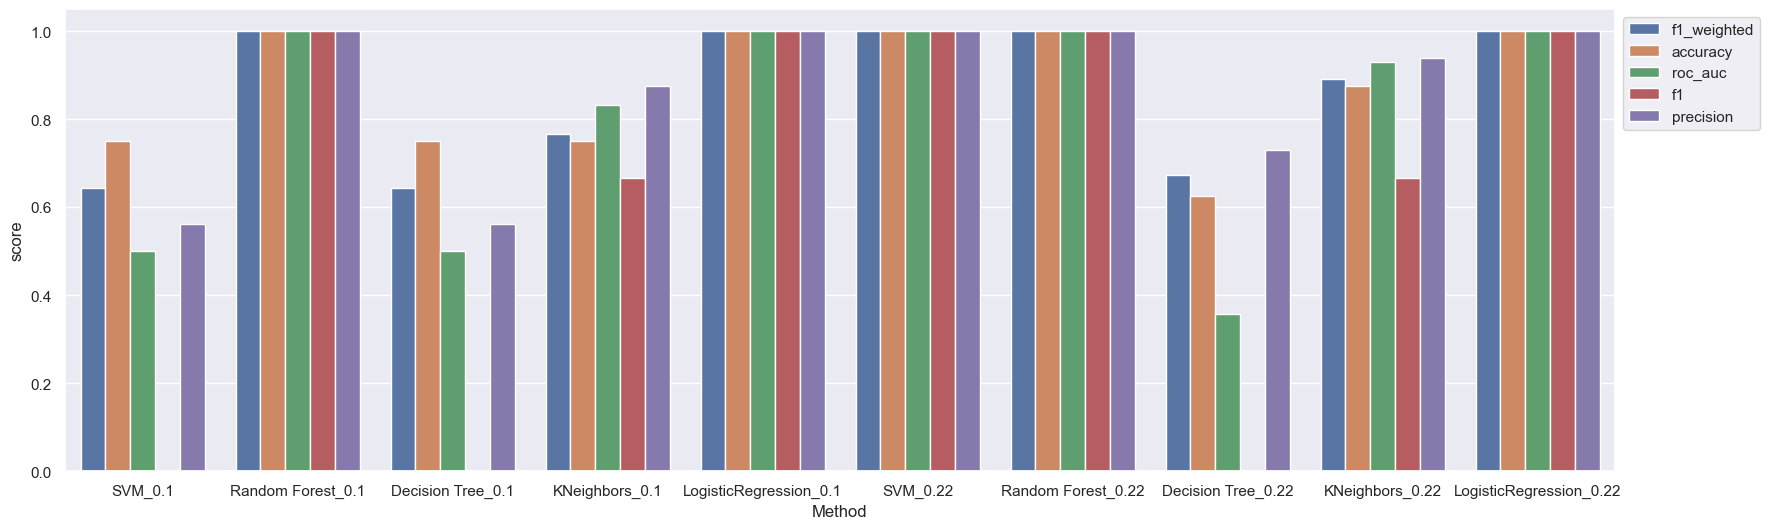

In [801]:
plt.rcParams["figure.figsize"] = [20,6]
sns.barplot(melt_train_test, x = 'Method', y = 'score', hue = 'metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()          

#### With cross fold validation

In [895]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X_class, Y_class)

3

In [896]:
my_dictionary = {}
metrics = ['f1_weighted', 'accuracy', 'roc_auc', 'f1']

for name, model in models:
    
    scores = cross_validate(model, X_class, Y_class, cv=skf, scoring=metrics)

    dict_list = []
    for type_score in ['test_f1_weighted', 'test_accuracy', 'test_roc_auc', 'test_f1']:
        variable = round(scores[type_score].mean(), 3) 
        dict_list.append(variable)


    my_dictionary[name + "_"  + 'cross_val(3)'] = dict_list

cross_val = pd.DataFrame.from_dict(my_dictionary, orient='index',
                       columns=['f1_weighted', 'accuracy', 'roc_auc', 'f1'])

new_cross_val = cross_val.rename_axis('Method').reset_index()

melt_cross_val = pd.melt(
    new_cross_val, 
    id_vars= ['Method'], 
    value_vars=('f1_weighted','accuracy', 'roc_auc', 'f1'), 
    var_name='metrics', 
    value_name='score', 
    col_level=None
)
melt_cross_val.head(7)

Method      metrics  score
0                 SVM_cross_val(3)  f1_weighted  0.754
1       Random Forest_cross_val(3)  f1_weighted  0.855
2       Decision Tree_cross_val(3)  f1_weighted  0.835
3          KNeighbors_cross_val(3)  f1_weighted  0.751
4  LogisticRegression_cross_val(3)  f1_weighted  0.884
5                 SVM_cross_val(3)     accuracy  0.801
6       Random Forest_cross_val(3)     accuracy  0.884

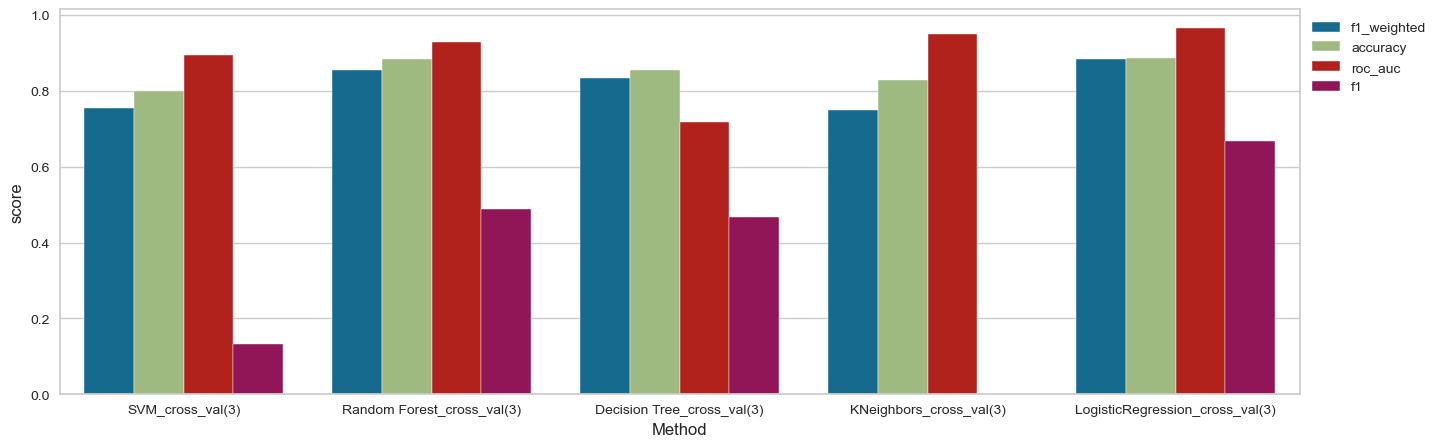

In [897]:
plt.rcParams["figure.figsize"] = [16,5]
sns.barplot(melt_cross_val, x = 'Method', y = 'score', hue = 'metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Confusion matrix for cross validation (each fold)

In [899]:
X_class_numpy = X_class.to_numpy()
Y_class_numpy = Y_class.to_numpy()

In [900]:
from museotoolbox.cross_validation import RandomStratifiedKFold
RSKF = RandomStratifiedKFold(n_splits=3,
                random_state=42,verbose=False)

In [901]:
SL = SuperLearner(classifier=DecisionTreeClassifier(random_state=42), param_grid=dict(max_depth=[10,100]) )
SL.fit(X_class_numpy, Y_class_numpy, cv=RSKF) 

In [902]:
cms = []
for stats in SL.get_stats_from_cv(confusion_matrix=True):
    cms.append(stats['confusion_matrix'])
    print(stats['confusion_matrix'])

[[8 1]
 [1 1]]
[[7 2]
 [1 1]]
[[8 1]
 [1 1]]


Text(0.5, 1.0, 'AVERAGE')

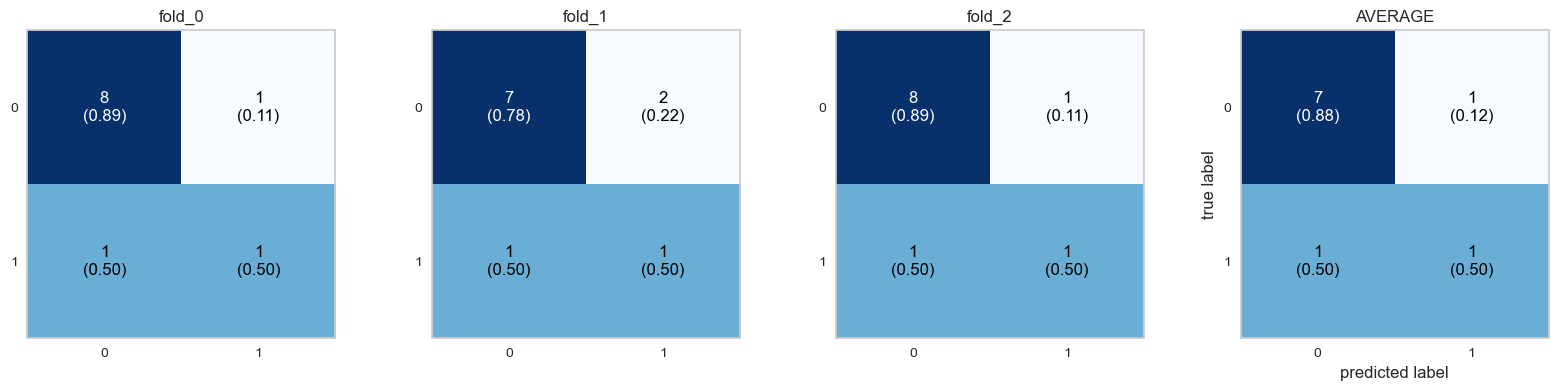

In [904]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for matrix in range(len(cms)):
    #print(matrix)
    plot_confusion_matrix(conf_mat=cms[matrix],
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False, axis = axes[matrix], figure = fig)
    axes[matrix].set_title('fold_' + str(matrix))

meanCM = np.mean(cms,axis=0).astype(np.int16)
plot_confusion_matrix(conf_mat=meanCM,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False, axis = axes[len(cms)], figure = fig)
axes[len(cms)].set_title('AVERAGE')

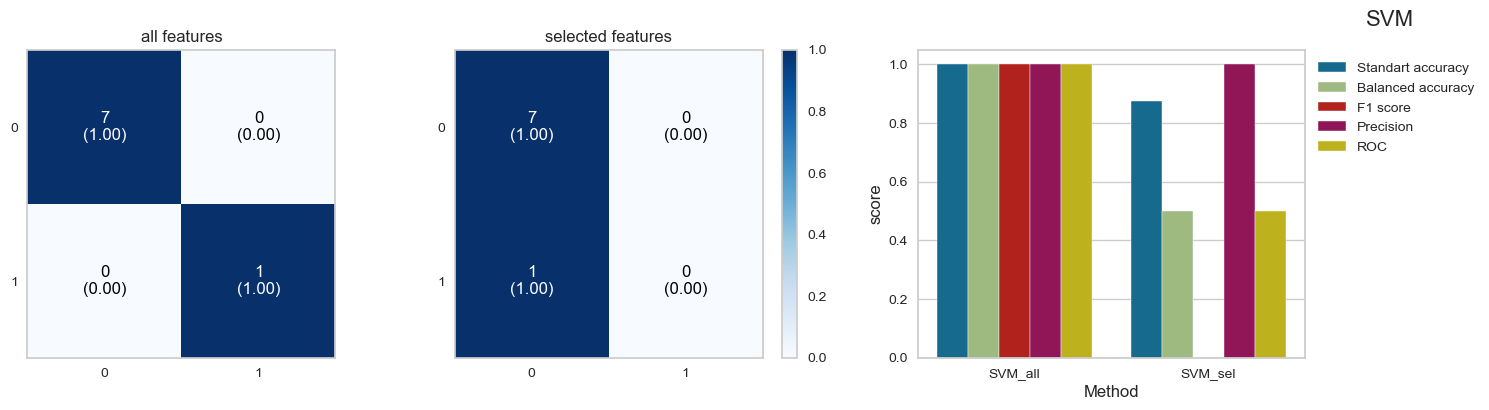

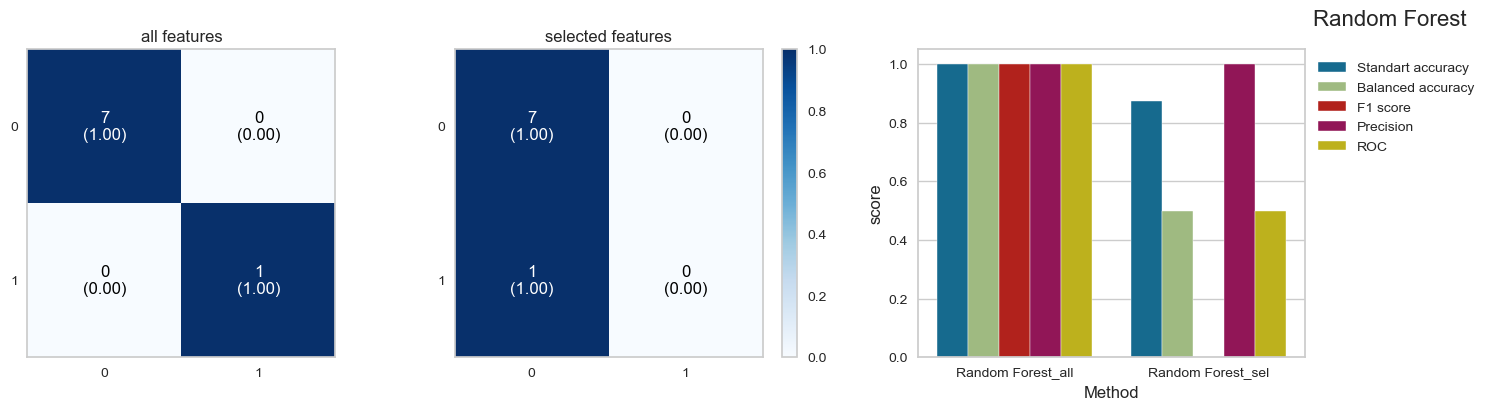

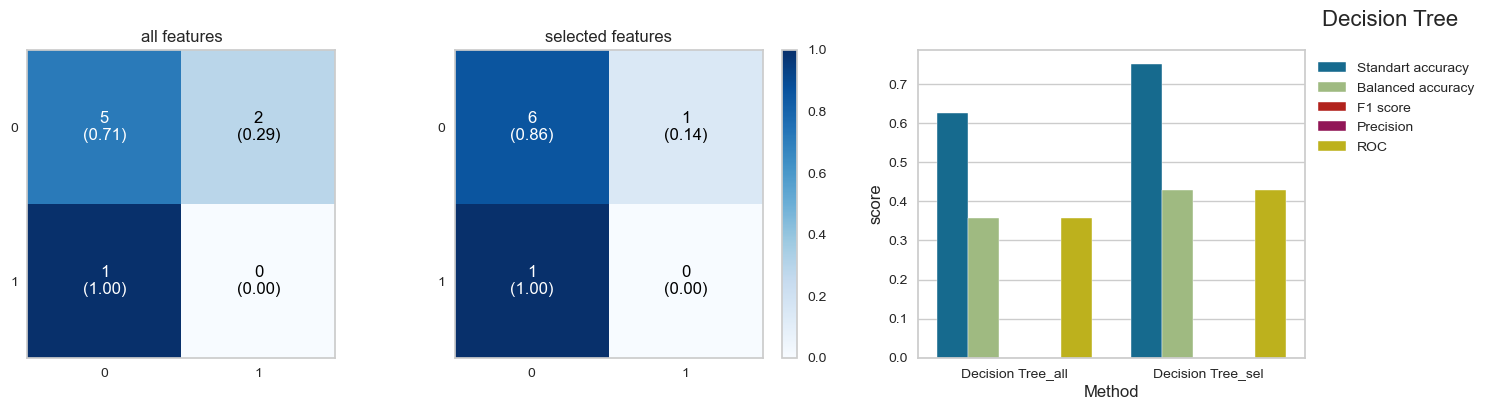

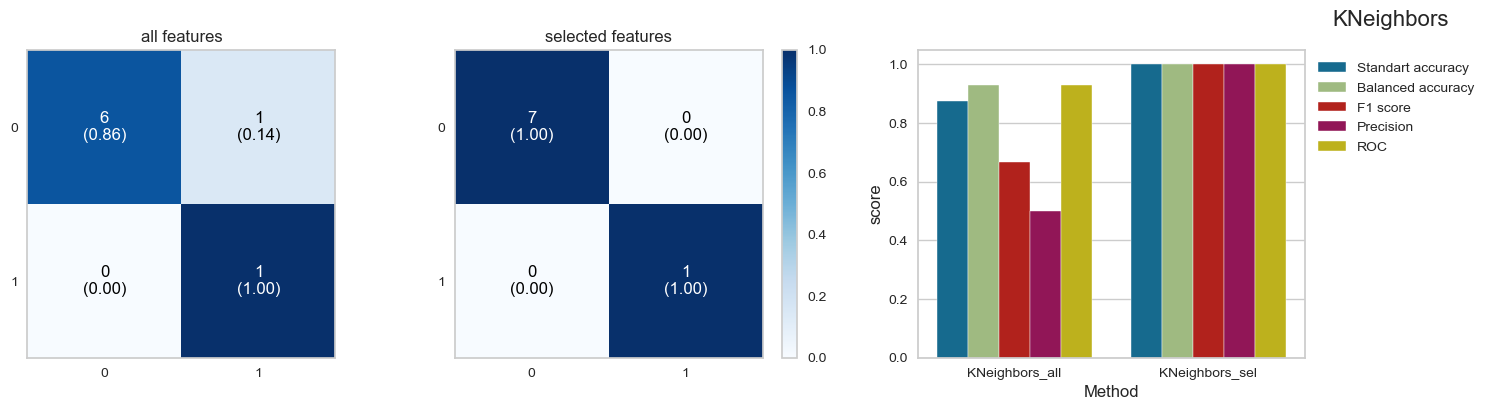

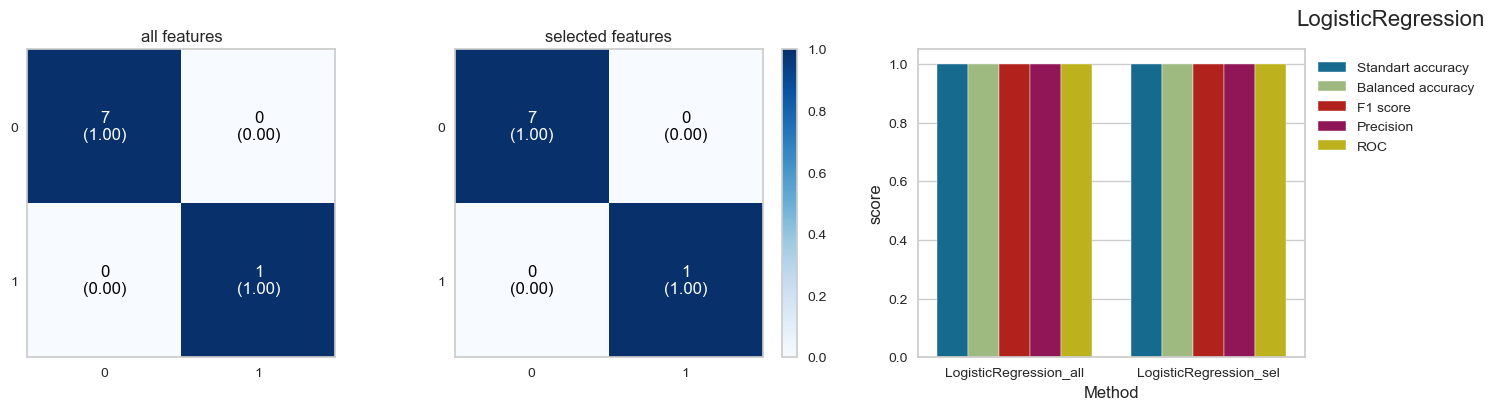

In [905]:
confusion_matrix_function(X_class, Y_class, heatmap_features, 0.22)

# Feature selection techniques

## Embedded methods 
* Decition tree

In [810]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

In [811]:
import dtreeviz.trees

In [812]:
import dtreeviz

Decision Tree


c:\Users\olshana1\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


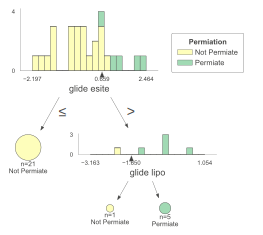

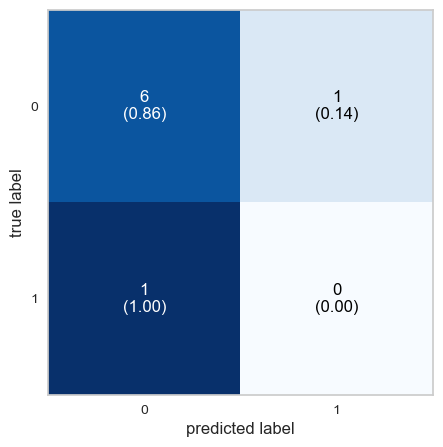

In [906]:
from sklearn.tree import plot_tree

for test_size_x in [0.22]:
    X_train, X_test, y_train, y_test = train_test_split(X_class[heatmap_features], 
                                                    Y_class, test_size=test_size_x, 
                                                    random_state=42, stratify=Y_class)
    #print(test_size_x)

    for name, model in models:
        if name == 'Decision Tree':
            print(name)
            model.fit(X_train, y_train)

            #plot_tree(model, filled=True, rounded=True) 
            #plt.show()
            viz_model = dtreeviz.model(model,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns,
                           target_name='Permiation',
                           class_names=['Not Permiate', 'Permiate'],)
            
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)
            plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)


            

viz_model.view()
            

## Filter methods - based on properties

* Variance threshold

The var() method calculates the standard deviation for each column.

In [814]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_X_class = scaler.fit_transform(X_class[heatmap_features])

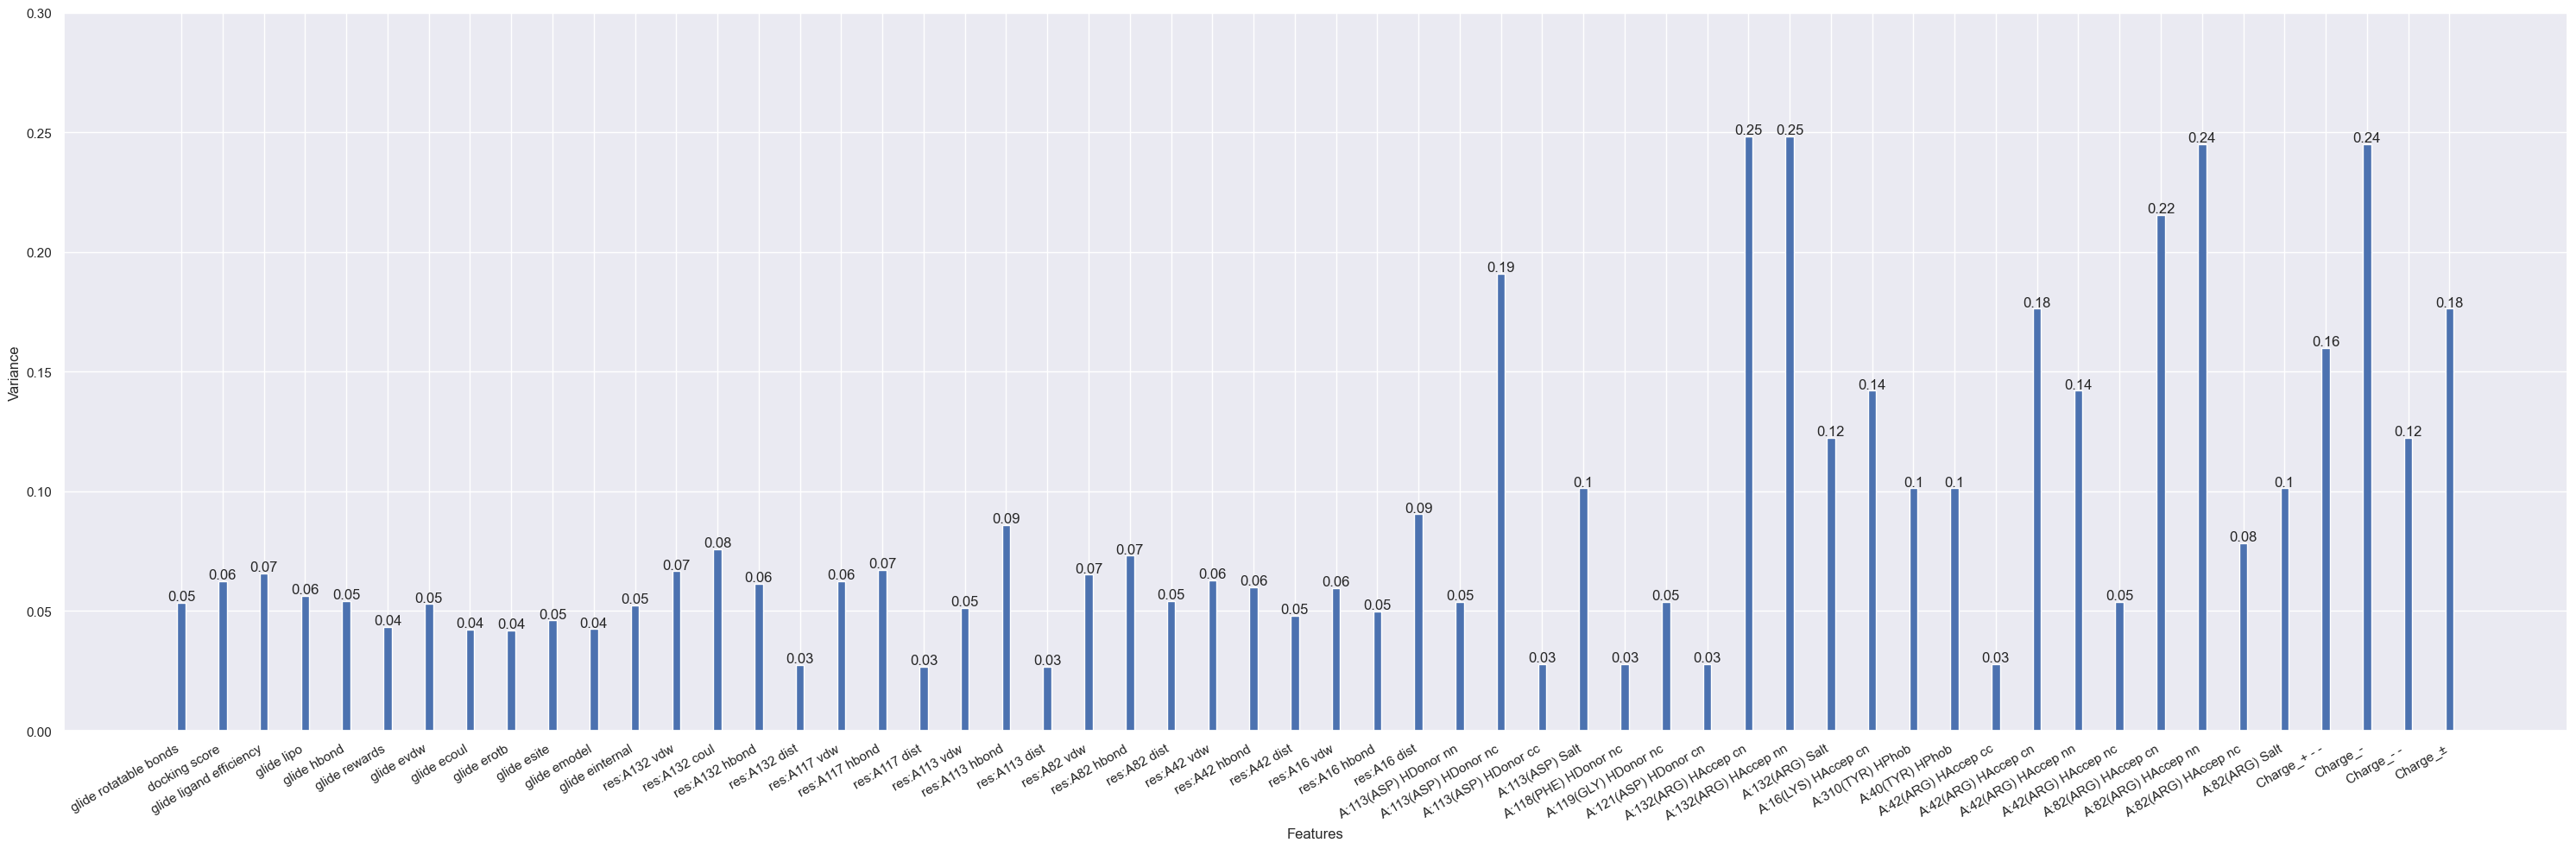

In [816]:
fig, ax = plt.subplots(figsize = (30,10))

x = X_class[heatmap_features].columns 
y = scaled_X_class.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.3)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 2)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

21
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'Charge_+ - -', 'Charge_-', 'Charge_- - ', 'Charge_±']
Shape before PCA:  (35, 21)
Shape after PCA:  (35, 5)


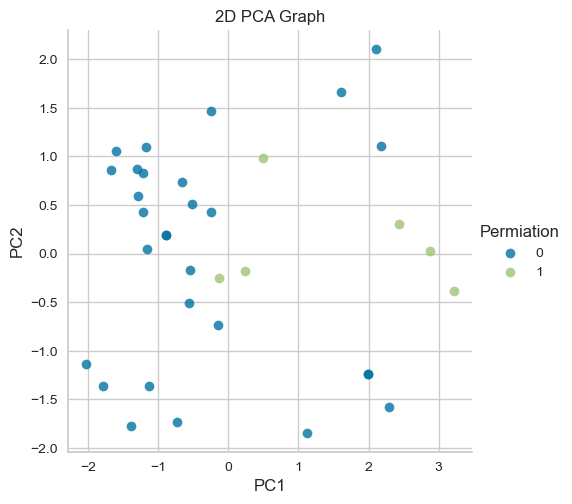

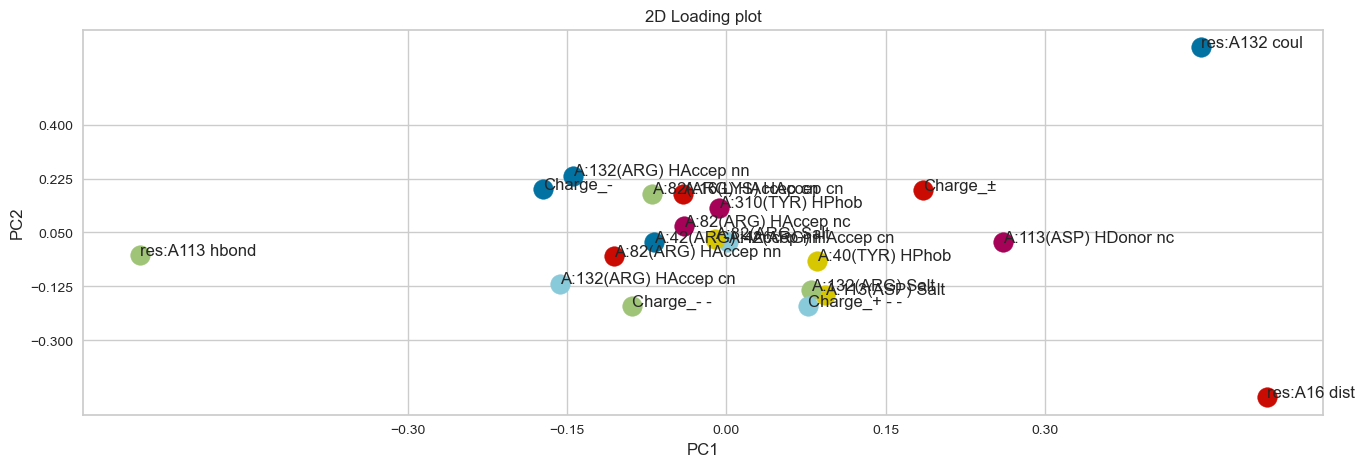

In [911]:
d = {'Feature': X_class[heatmap_features].columns.tolist() ,'Variance': scaled_X_class.var(axis=0).tolist()}
Feature_Variance = pd.DataFrame(d)

important_features = Feature_Variance[Feature_Variance['Variance'] >= 0.075]
variance_features = important_features['Feature'].tolist()
print(len(variance_features))
print(variance_features)
PCA_function(5, df[variance_features])

In [912]:
X_fea = X_class[variance_features]

In [703]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_fea, Y_class)

5

In [704]:
my_dictionary = {}
metrics = ['f1_weighted', 'accuracy', 'roc_auc', 'f1']

for name, model in models:
    
    scores = cross_validate(model, X_fea, Y_class, cv=skf, scoring=metrics)

    dict_list = []
    for type_score in ['test_f1_weighted', 'test_accuracy', 'test_roc_auc', 'test_f1']:
        variable = round(scores[type_score].mean(), 3) 
        dict_list.append(variable)


    my_dictionary[name + "_"  + 'cross_val(5)'] = dict_list

cross_val = pd.DataFrame.from_dict(my_dictionary, orient='index',
                       columns=['f1_weighted', 'accuracy', 'roc_auc', 'f1'])

new_cross_val = cross_val.rename_axis('Method').reset_index()

melt_cross_val = pd.melt(
    new_cross_val, 
    id_vars= ['Method'], 
    value_vars=('f1_weighted','accuracy', 'roc_auc', 'f1'), 
    var_name='metrics', 
    value_name='score', 
    col_level=None
)
melt_cross_val.head(7)

Method      metrics  score
0                 SVM_cross_val(5)  f1_weighted  0.769
1       Random Forest_cross_val(5)  f1_weighted  0.803
2       Decision Tree_cross_val(5)  f1_weighted  0.697
3          KNeighbors_cross_val(5)  f1_weighted  0.837
4  LogisticRegression_cross_val(5)  f1_weighted  0.810
5                 SVM_cross_val(5)     accuracy  0.829
6       Random Forest_cross_val(5)     accuracy  0.829

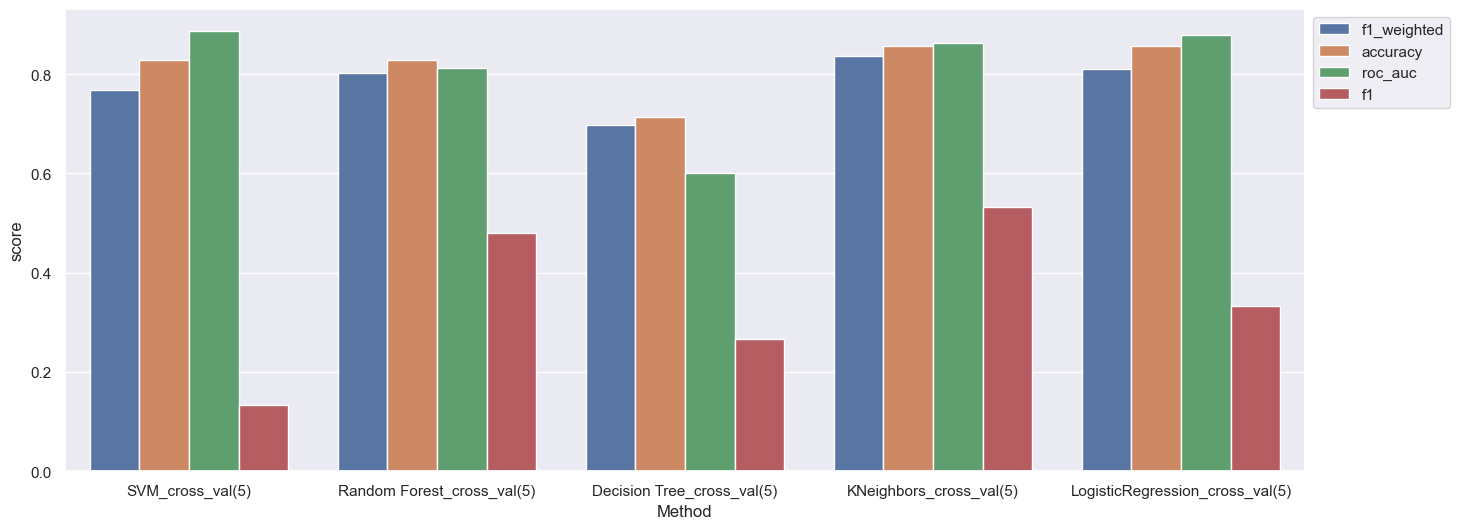

In [705]:
plt.rcParams["figure.figsize"] = [16,6]
sns.barplot(melt_cross_val, x = 'Method', y = 'score', hue = 'metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Confusion matrix comparison 
### Classification methods

In [706]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

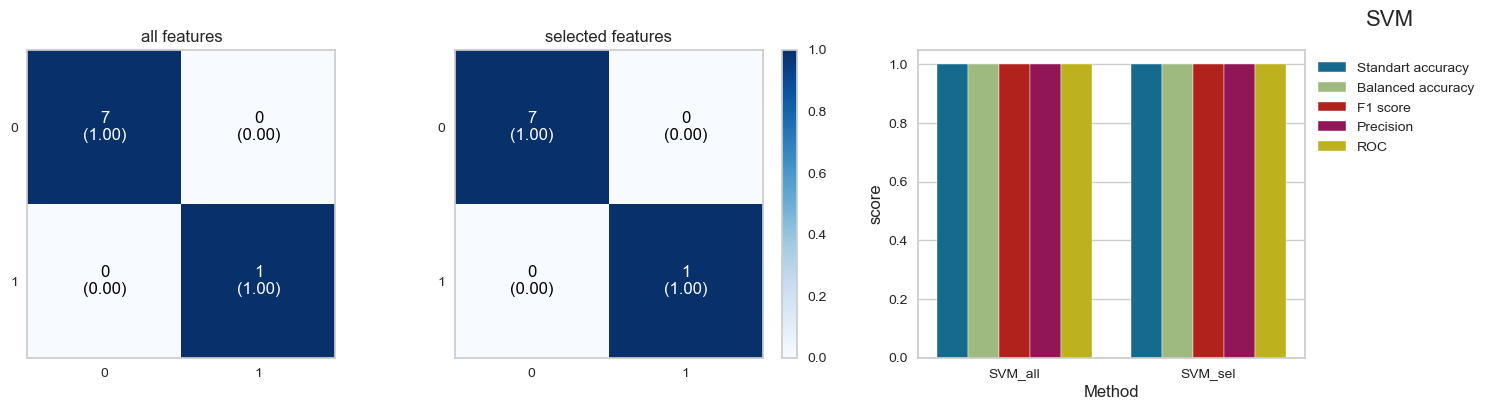

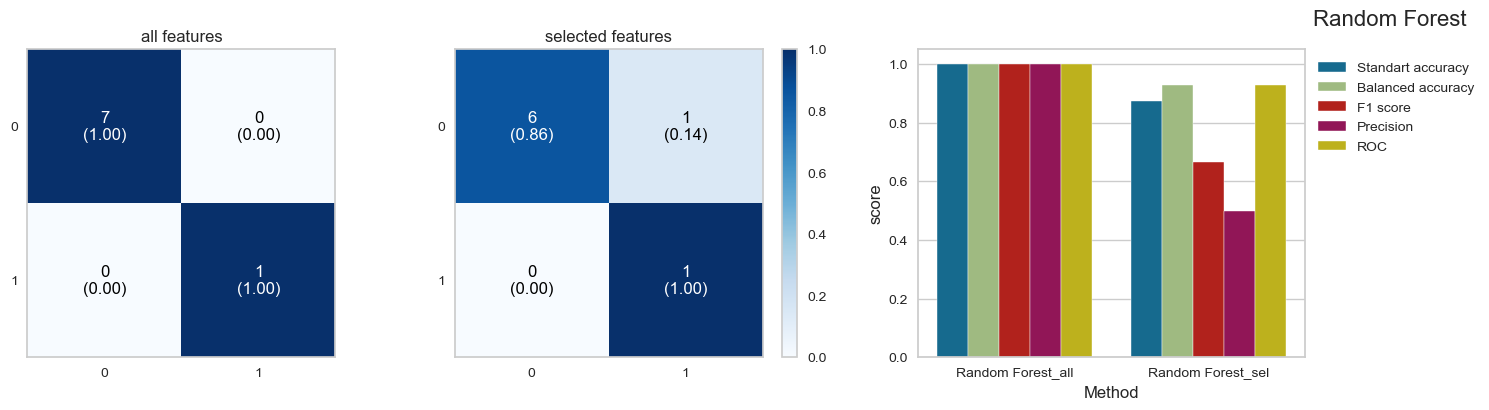

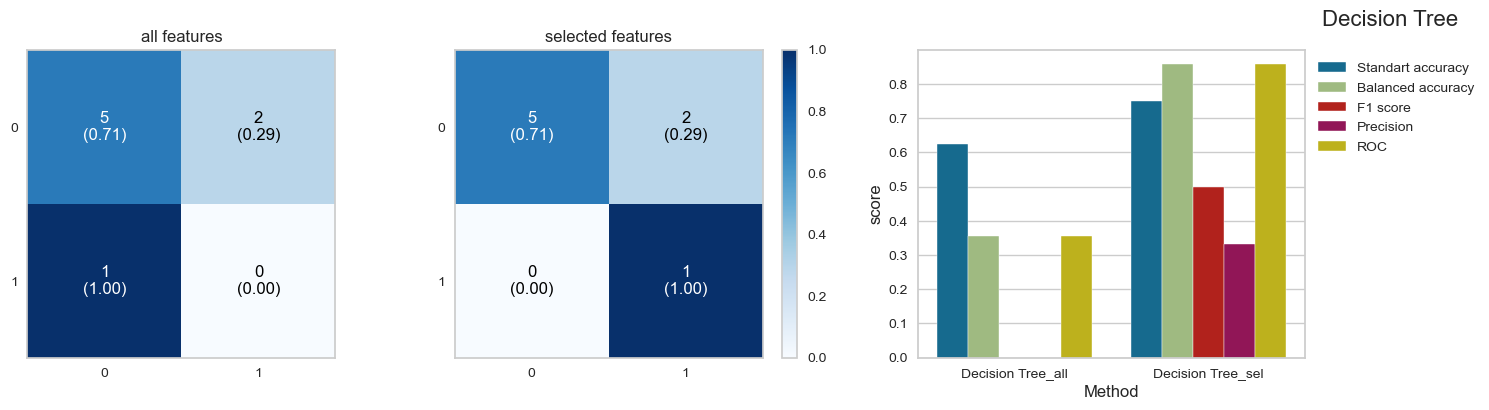

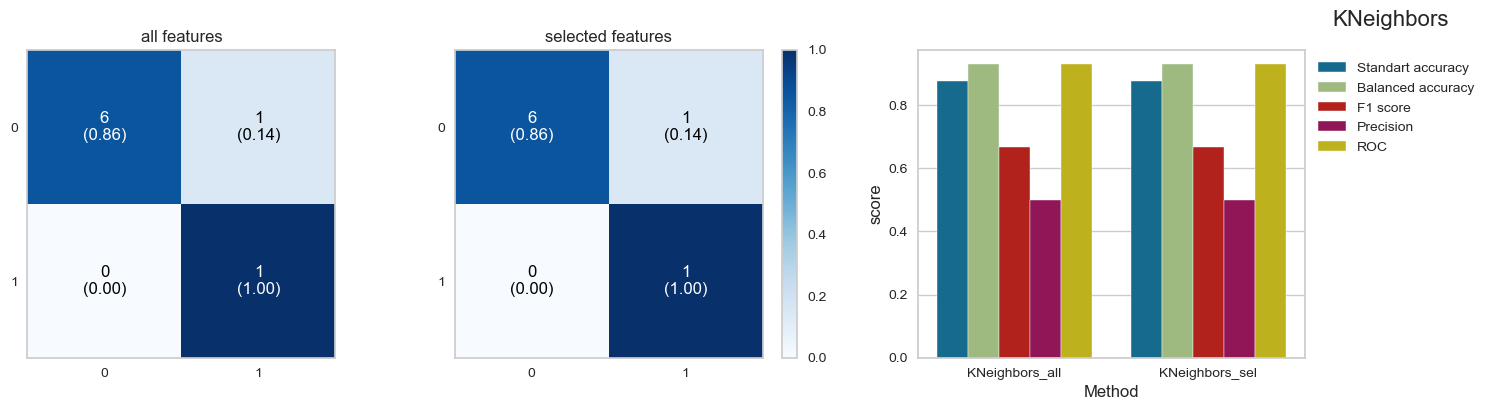

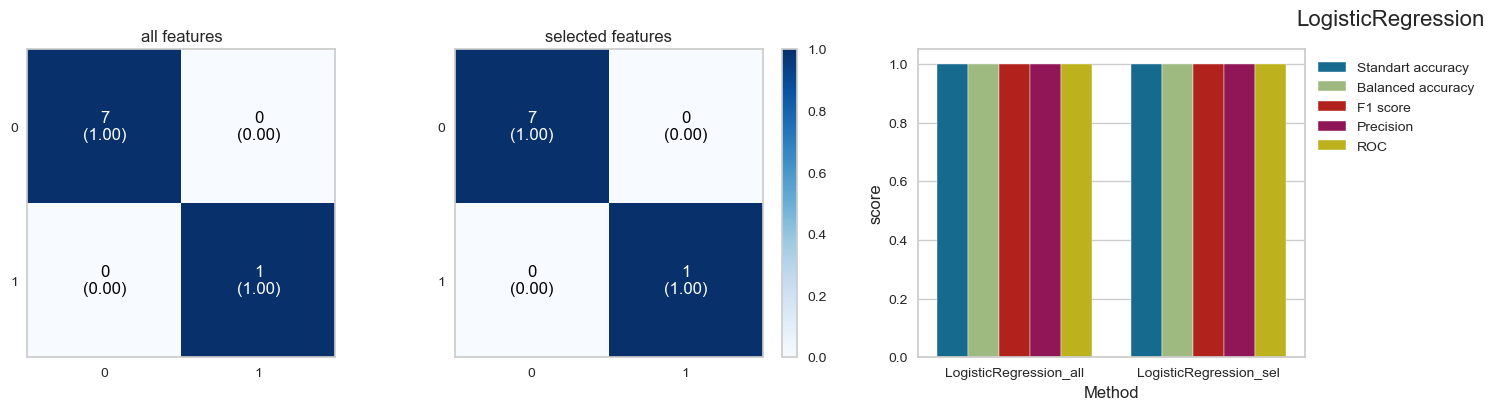

In [913]:
confusion_matrix_function(X_class, Y_class, variance_features, 0.22)

Decision Tree


c:\Users\olshana1\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


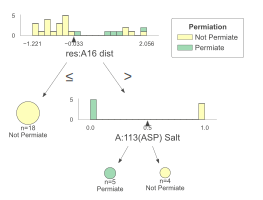

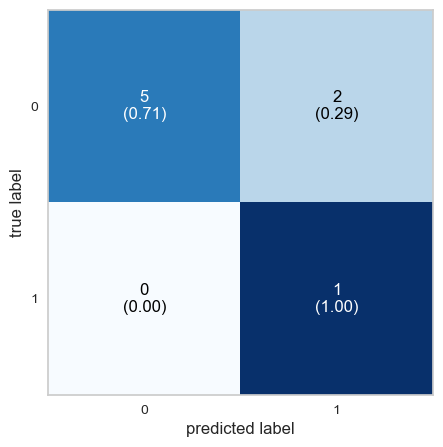

In [916]:
from sklearn.tree import plot_tree

for test_size_x in [0.22]:
    X_train, X_test, y_train, y_test = train_test_split(X_class[variance_features], 
                                                    Y_class, test_size=test_size_x, 
                                                    random_state=42, stratify=Y_class)
    #print(test_size_x)

    for name, model in models:
        if name == 'Decision Tree':
            print(name)
            model.fit(X_train, y_train)

            #plot_tree(model, filled=True, rounded=True) 
            #plt.show()
            viz_model = dtreeviz.model(model,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns,
                           target_name='Permiation',
                           class_names=['Not Permiate', 'Permiate'],)
            
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)
            plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)


            

viz_model.view()
            

In [72]:
selected_fech = df[variance_features]

Shape before PCA:  (35, 17)
Shape after PCA:  (35, 2)


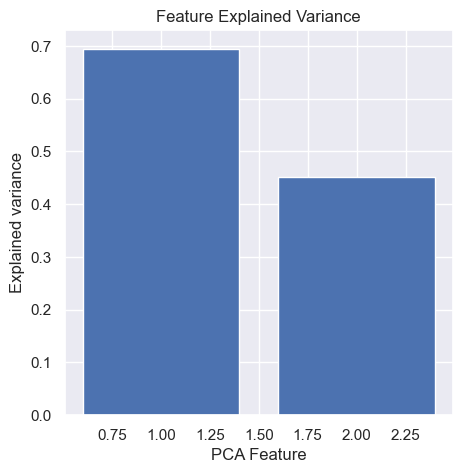

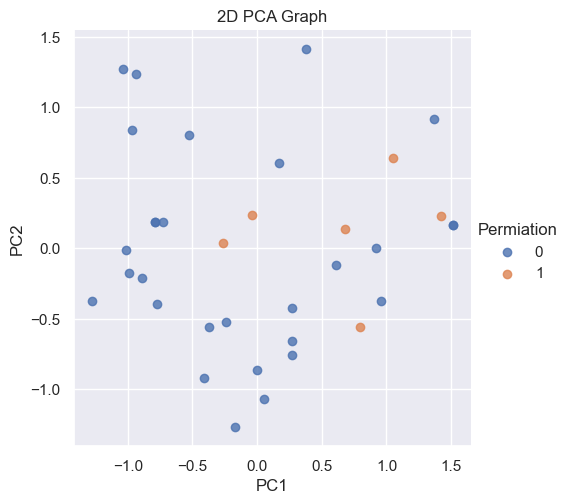

In [863]:
pca = PCA(n_components=2)
 
pca_features = pca.fit_transform(df[variance_features])
 
print('Shape before PCA: ', df[variance_features].shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

fig, ax = plt.subplots(figsize = (5,5))
 
from sklearn.decomposition import PCA
sns.set()

plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_, 
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

pca_df['Permiation'] = df['Permiation']

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='Permiation', 
    fit_reg=False, 
    legend=True
    )
plt.title('2D PCA Graph')
plt.show()

# Embedded methods - based on target value

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_class, 
                                                    Y_class, test_size=0.22, 
                                                    random_state=42, stratify=Y_class)
   

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.875


In [43]:
coef = lr.coef_[0].tolist()
feature_a = X_class.columns.tolist()

for n in range(len(lr.coef_[0].tolist())):
    print(coef[n], feature_a[n])


0.0 glide rotatable bonds
0.0 docking score
0.0 glide ligand efficiency
0.0 glide ligand efficiency sa
0.0 glide ligand efficiency ln
0.0 glide gscore
0.0 glide lipo
0.4547727967153379 glide hbond
-0.2830538903440095 glide rewards
0.0 glide evdw
0.0 glide ecoul
0.0 glide erotb
0.3952390464894071 glide esite
0.0 glide emodel
0.0 glide energy
0.0 glide einternal
0.0 res:A132 vdw
0.0 res:A132 coul
0.6435905735821936 res:A132 hbond
0.0 res:A132 dist
0.0 res:A132 Eint
0.0 res:A117 vdw
0.0 res:A117 coul
0.0 res:A117 hbond
0.0 res:A117 dist
0.0 res:A117 Eint
0.0 res:A113 vdw
0.0 res:A113 coul
0.0 res:A113 hbond
0.0 res:A113 dist
0.0 res:A113 Eint
0.2902551543754944 res:A82 vdw
0.0 res:A82 coul
0.0 res:A82 hbond
0.0 res:A82 dist
0.0 res:A82 Eint
0.0 res:A42 vdw
0.0 res:A42 coul
0.0 res:A42 hbond
0.0 res:A42 dist
0.0 res:A42 Eint
0.0 res:A16 vdw
0.0 res:A16 coul
0.0 res:A16 hbond
0.4312018131213505 res:A16 dist
0.0 res:A16 Eint
0.0 A:113(ASP) HDonor nn
0.0 A:113(ASP) HDonor nc
0.0 A:113(ASP) HD

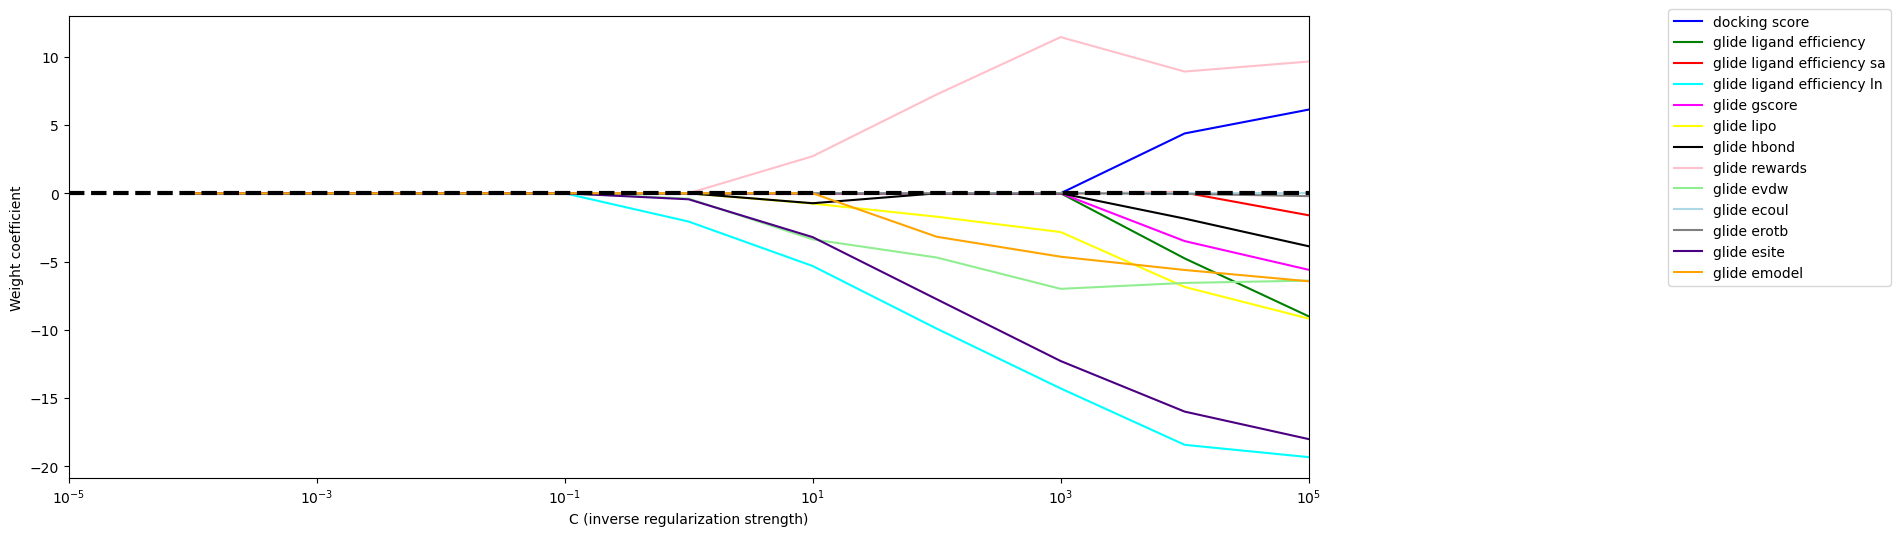

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train[variance_features], y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X_class.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### Regression algorithms

In [ ]:
regression_algorithms = [['Random Forest Reg', RandomForestRegressor(random_state=42)],
                         ['Decision Tree Reg', DecisionTreeRegressor(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

In [339]:
rand_for_reg = DecisionTreeRegressor(random_state=42)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, 
                                                    Y_class, test_size=0.22, 
                                                    random_state=42, stratify=Y_class)

In [340]:
rand_for_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [341]:
y_predict = rand_for_reg.predict(X_test)

In [342]:
r2_score(y_test, y_predict)

-2.4285714285714284

#### RFE

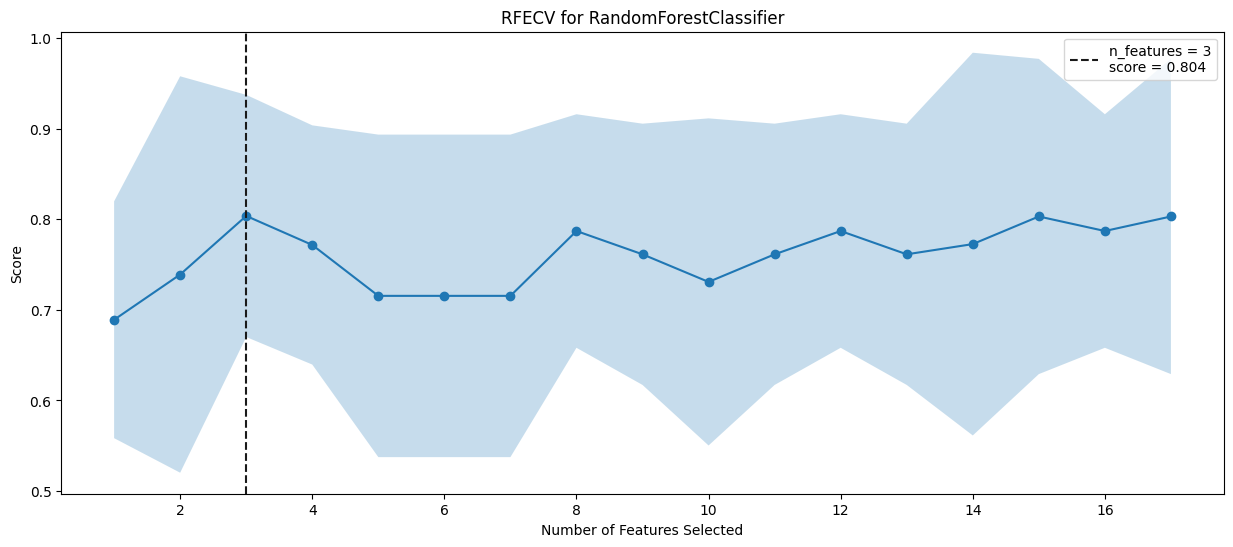

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [700]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(random_state=42), cv=cv, scoring='f1_weighted')
visualizer.fit(X_fea, Y_class) 
visualizer.show()

In [701]:
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

Index(['A:132(ARG) HAccep nn', 'A:82(ARG) HAccep nn', 'Charge_±'], dtype='object')


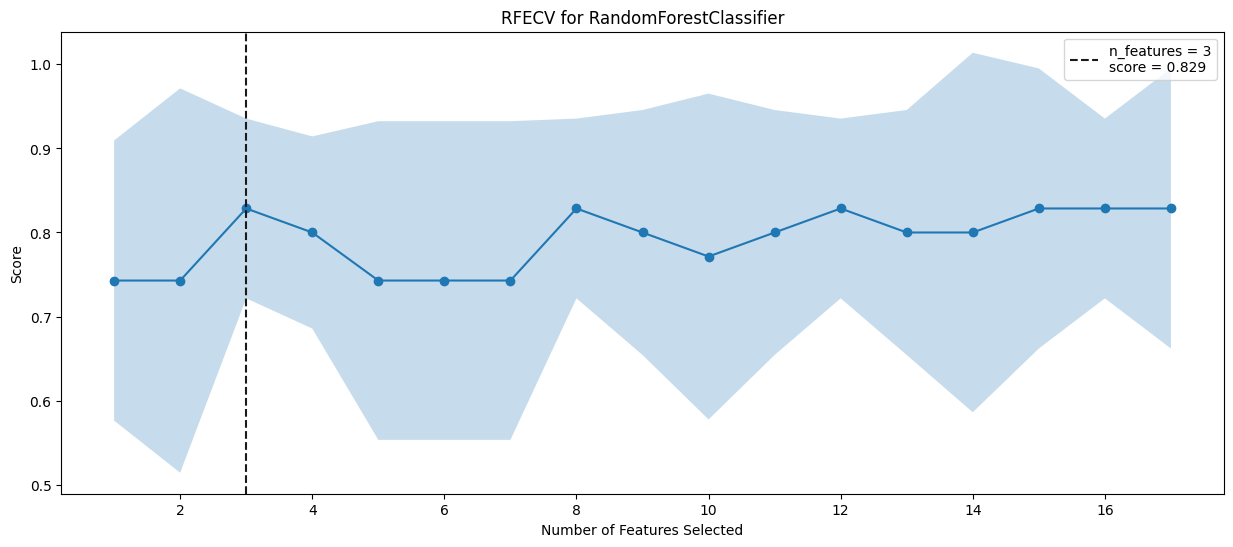

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [702]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(random_state=42), cv=cv, scoring='accuracy')
visualizer.fit(X_fea, Y_class) 
visualizer.show()

In [703]:
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

Index(['A:132(ARG) HAccep nn', 'A:82(ARG) HAccep nn', 'Charge_±'], dtype='object')


In [704]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()]]

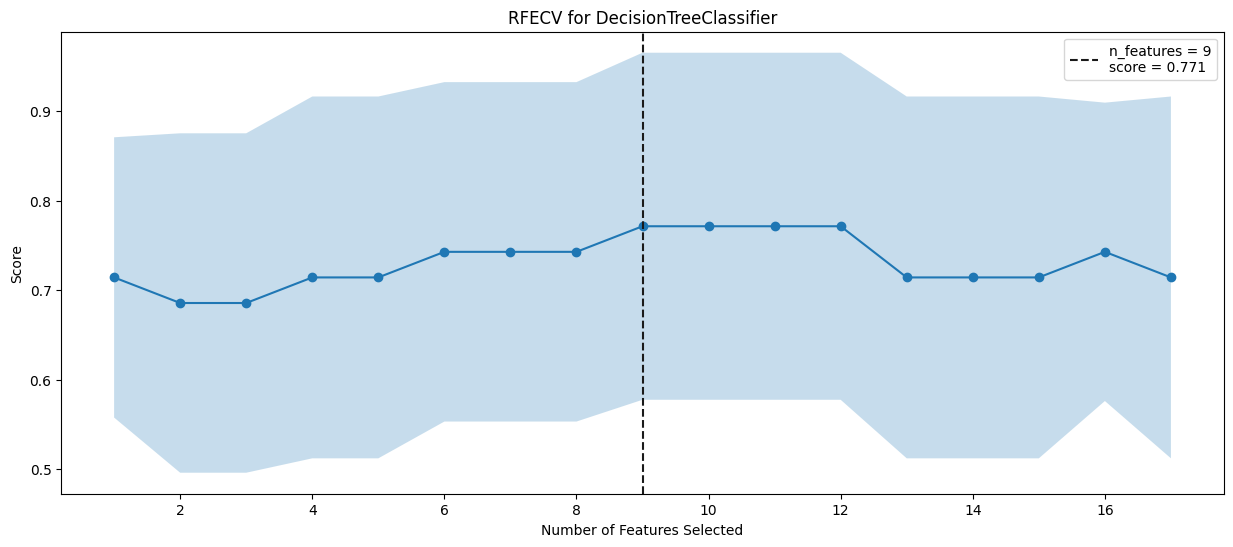

Index(['A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:310(TYR) HPhob',
       'A:82(ARG) HAccep nn', 'A:82(ARG) Salt', 'Charge_+ - -', 'Charge_-',
       'Charge_- - ', 'Charge_±'],
      dtype='object')


In [705]:
cv = StratifiedKFold(5)
visualizer = RFECV(DecisionTreeClassifier(random_state=42), cv=cv, scoring='accuracy')
visualizer.fit(X_fea, Y_class) 
visualizer.show()
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

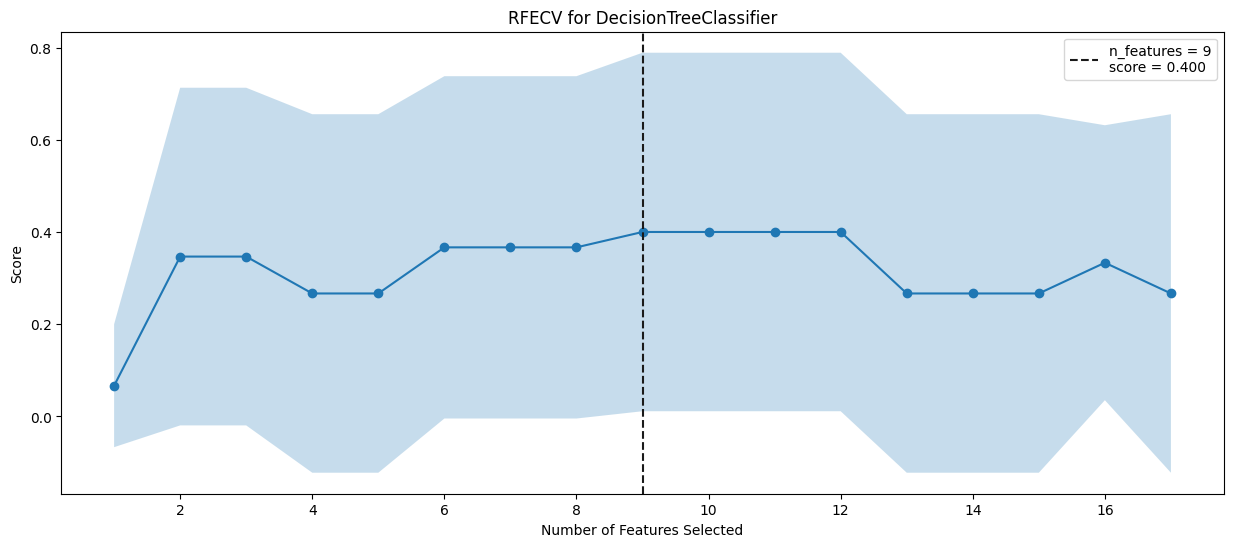

Index(['A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:310(TYR) HPhob',
       'A:82(ARG) HAccep nn', 'A:82(ARG) Salt', 'Charge_+ - -', 'Charge_-',
       'Charge_- - ', 'Charge_±'],
      dtype='object')


In [707]:
cv = StratifiedKFold(5)
visualizer = RFECV(DecisionTreeClassifier(random_state=42), cv=cv, scoring='f1')
visualizer.fit(X_fea, Y_class) 
visualizer.show()
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

# Initialize classifier

F1 = 2 * (precision * recall) / (precision + recall)

## Recursive feature elimination (RFE) 

In [86]:
from sklearn.feature_selection import RFE

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [866]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV

In [867]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

LogisticRegression
Index(['glide rotatable bonds', 'glide ligand efficiency', 'glide hbond',
       'glide rewards', 'glide esite', 'res:A132 coul', 'res:A132 hbond',
       'res:A132 dist', 'res:A82 hbond', 'res:A16 hbond', 'res:A16 dist'],
      dtype='object')


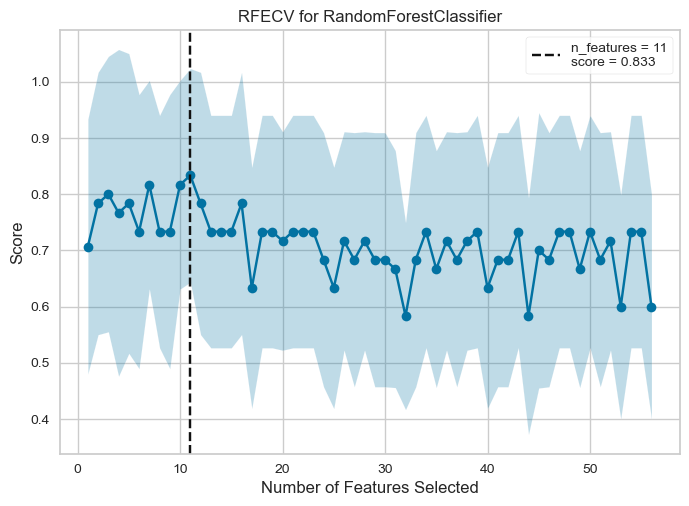

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [869]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(random_state=42), cv=cv, scoring='balanced_accuracy')
visualizer.fit(X_class[heatmap_features], Y_class) 
print(name)

selected_features_mask = visualizer.get_support()
selected_features = X_class[heatmap_features].columns[selected_features_mask]
print(selected_features)   
visualizer.show() 


In [918]:
select_feature_FRE_RF = ['glide rotatable bonds', 'glide ligand efficiency', 'glide hbond',
       'glide rewards', 'glide esite', 'res:A132 coul', 'res:A132 hbond',
       'res:A132 dist', 'res:A82 hbond', 'res:A16 hbond', 'res:A16 dist']

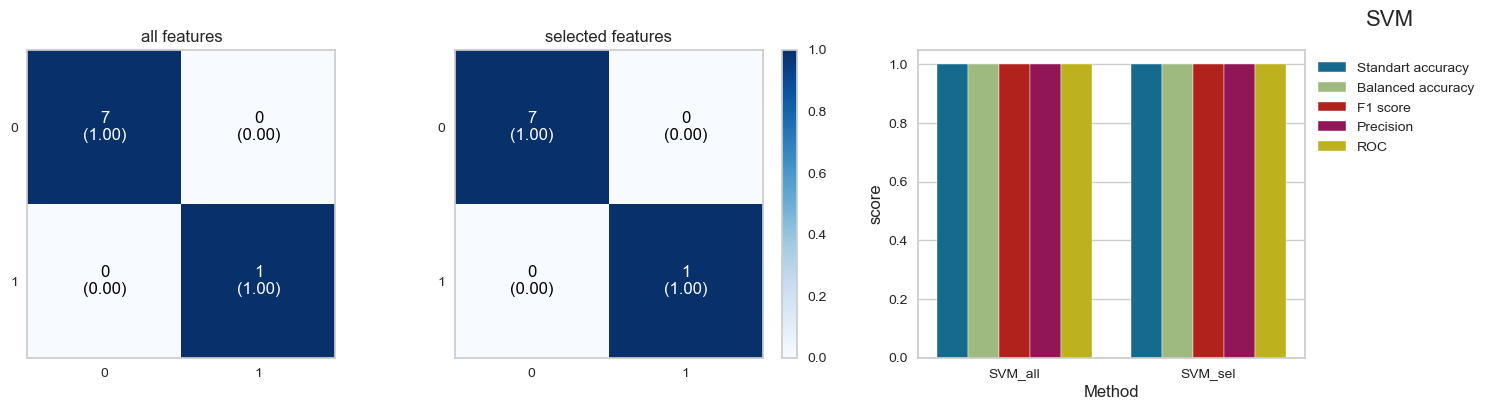

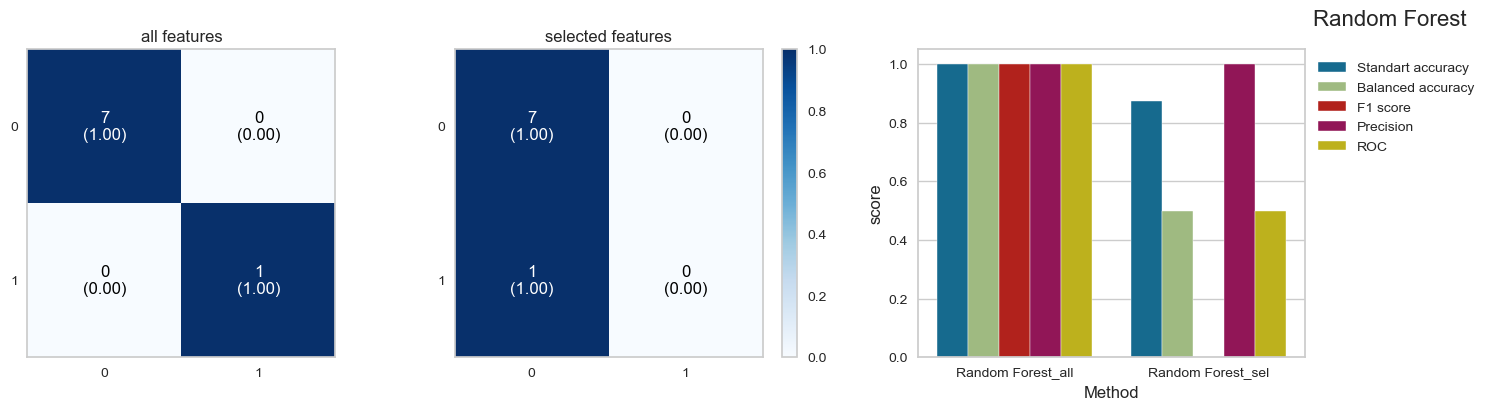

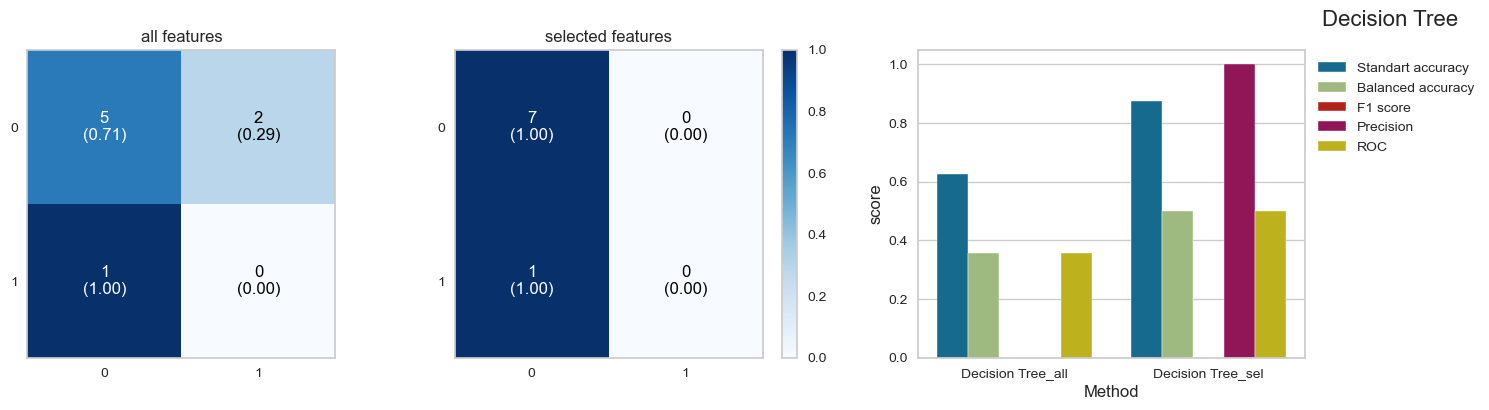

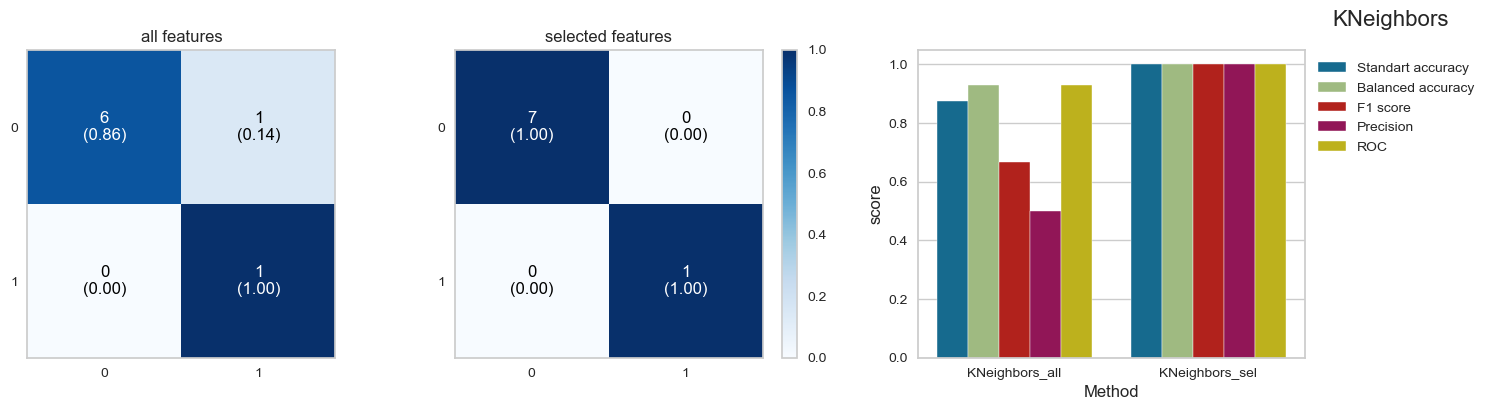

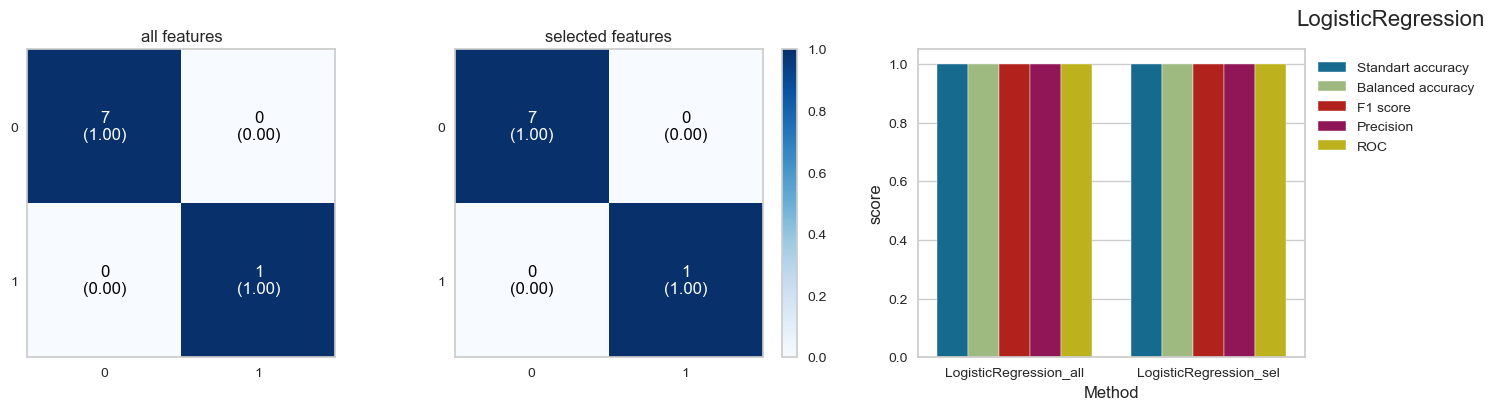

In [919]:
confusion_matrix_function(X_class, Y_class, select_feature_FRE_RF, 0.22)

LogisticRegression
Index(['res:A132 hbond', 'res:A132 dist', 'res:A117 vdw', 'res:A117 hbond',
       'res:A117 dist', 'res:A113 vdw', 'res:A113 hbond', 'res:A113 dist',
       'res:A82 vdw', 'res:A82 hbond', 'res:A82 dist', 'res:A42 vdw',
       'res:A42 hbond', 'res:A42 dist', 'res:A16 vdw', 'res:A16 hbond',
       'res:A16 dist', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor nc',
       'A:113(ASP) HDonor cc', 'A:113(ASP) Salt', 'A:118(PHE) HDonor nc',
       'A:119(GLY) HDonor nc', 'A:121(ASP) HDonor cn', 'A:132(ARG) HAccep cn',
       'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn',
       'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cc',
       'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:42(ARG) HAccep nc',
       'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc',
       'A:82(ARG) Salt', 'Charge_+ - -', 'Charge_-', 'Charge_- - ',
       'Charge_±'],
      dtype='object')


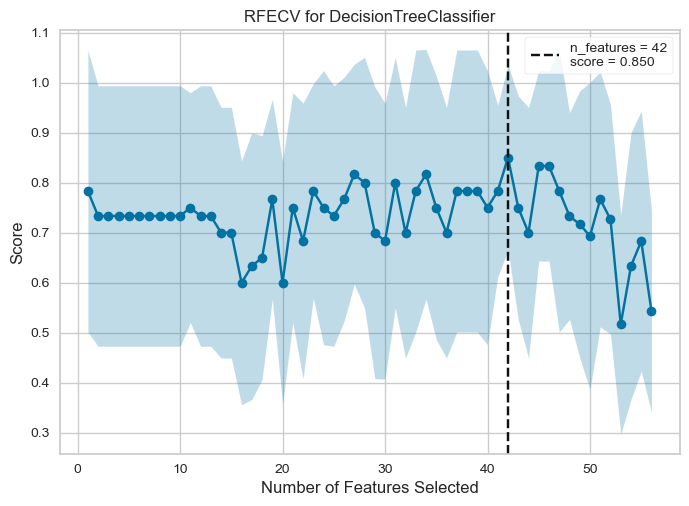

<Axes: title={'center': 'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [870]:
cv = StratifiedKFold(5)
visualizer = RFECV(DecisionTreeClassifier(random_state=42), cv=cv, scoring='balanced_accuracy')
visualizer.fit(X_class[heatmap_features], Y_class) 
print(name)

selected_features_mask = visualizer.get_support()
selected_features = X_class[heatmap_features].columns[selected_features_mask]
print(selected_features)   
visualizer.show()

In [920]:
sel_feach_after_RFE_TREE = ['res:A132 hbond', 'res:A132 dist', 'res:A117 vdw', 'res:A117 hbond',
       'res:A117 dist', 'res:A113 vdw', 'res:A113 hbond', 'res:A113 dist',
       'res:A82 vdw', 'res:A82 hbond', 'res:A82 dist', 'res:A42 vdw',
       'res:A42 hbond', 'res:A42 dist', 'res:A16 vdw', 'res:A16 hbond',
       'res:A16 dist', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor nc',
       'A:113(ASP) HDonor cc', 'A:113(ASP) Salt', 'A:118(PHE) HDonor nc',
       'A:119(GLY) HDonor nc', 'A:121(ASP) HDonor cn', 'A:132(ARG) HAccep cn',
       'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn',
       'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cc',
       'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:42(ARG) HAccep nc',
       'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc',
       'A:82(ARG) Salt', 'Charge_+ - -', 'Charge_-', 'Charge_- - ',
       'Charge_±']

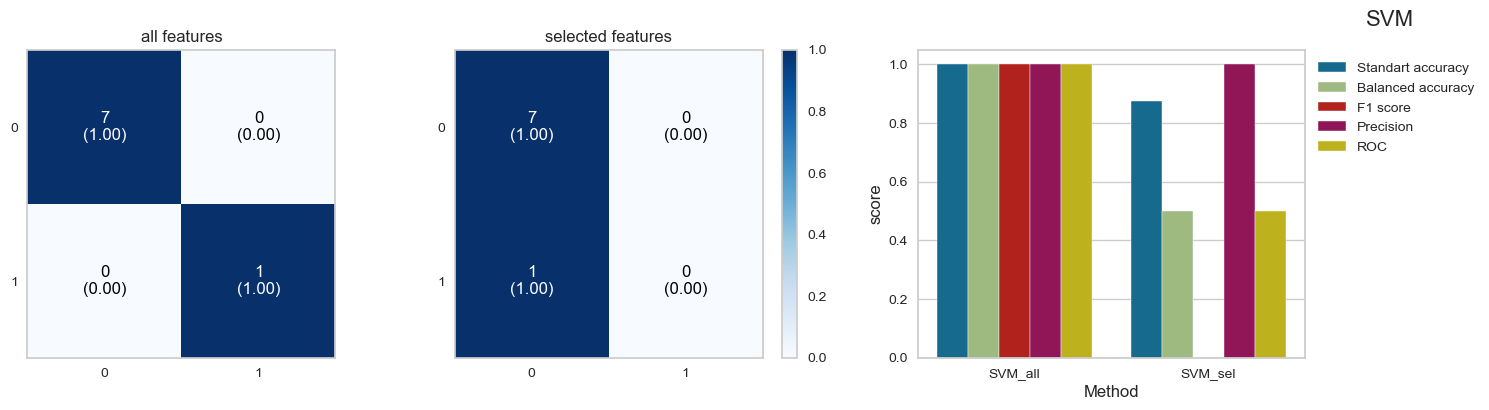

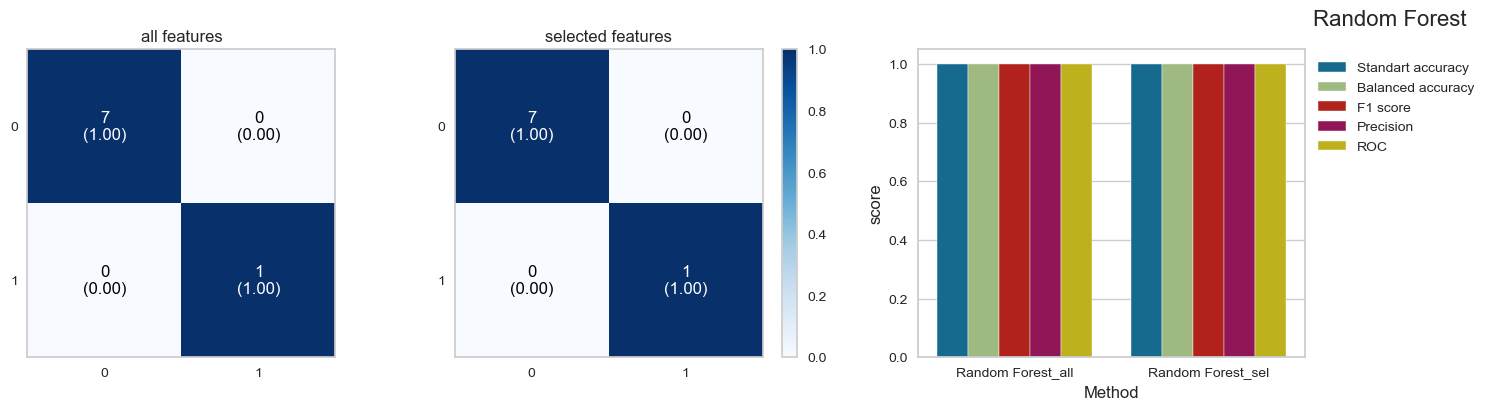

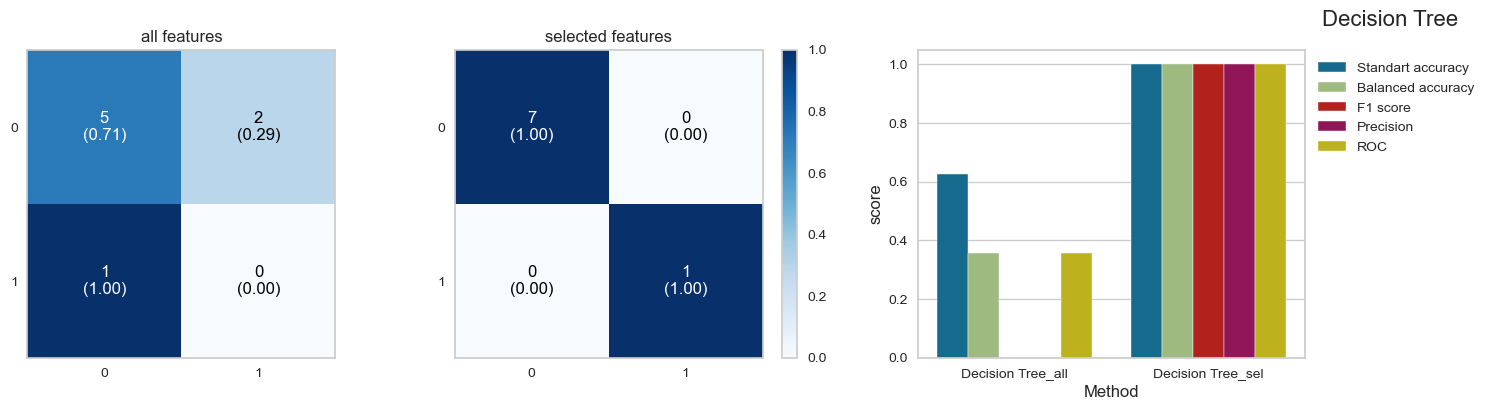

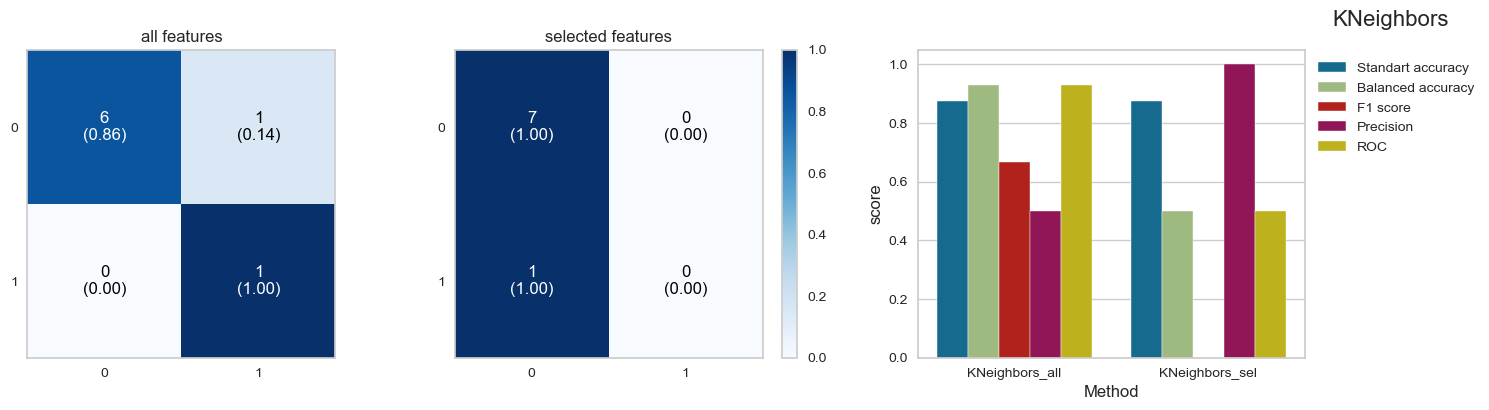

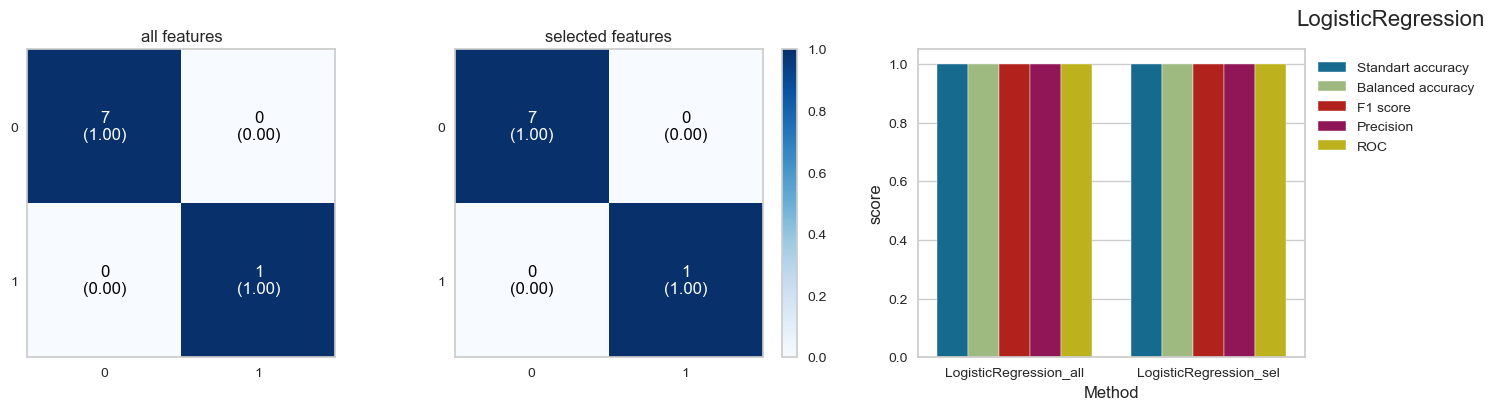

In [921]:
confusion_matrix_function(X_class, Y_class, sel_feach_after_RFE_TREE, 0.22)

Random Forest


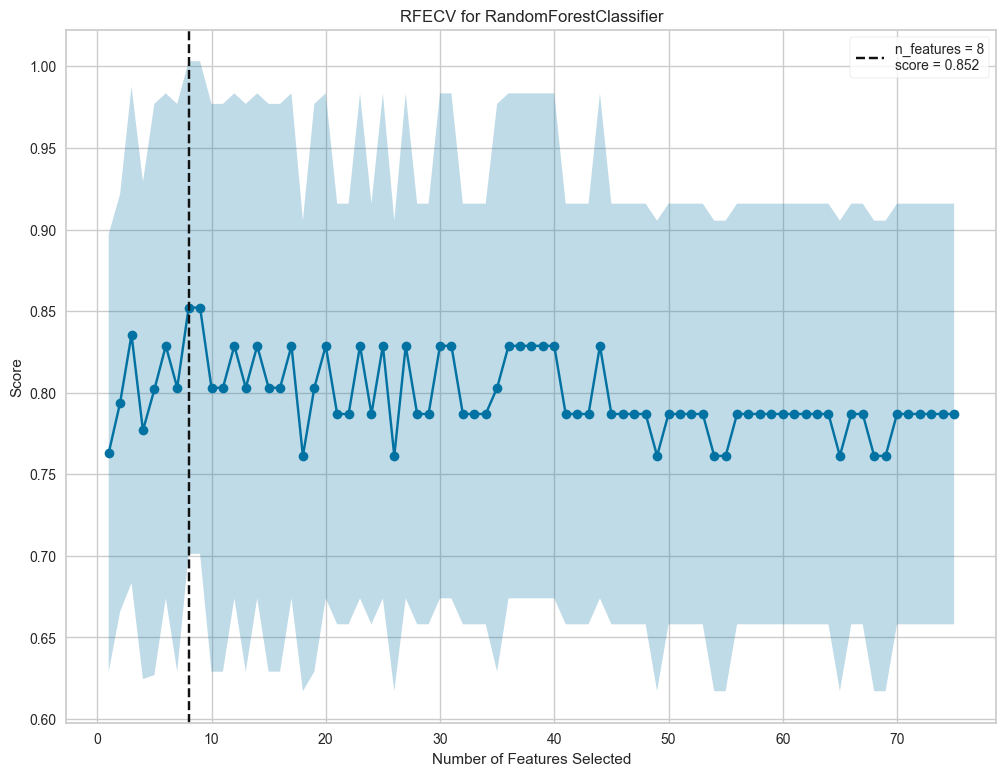

Index(['glide ligand efficiency', 'glide hbond', 'glide rewards',
       'glide esite', 'res:A132 hbond', 'res:A132 dist', 'res:A16 coul',
       'res:A16 Eint'],
      dtype='object')
Decision Tree


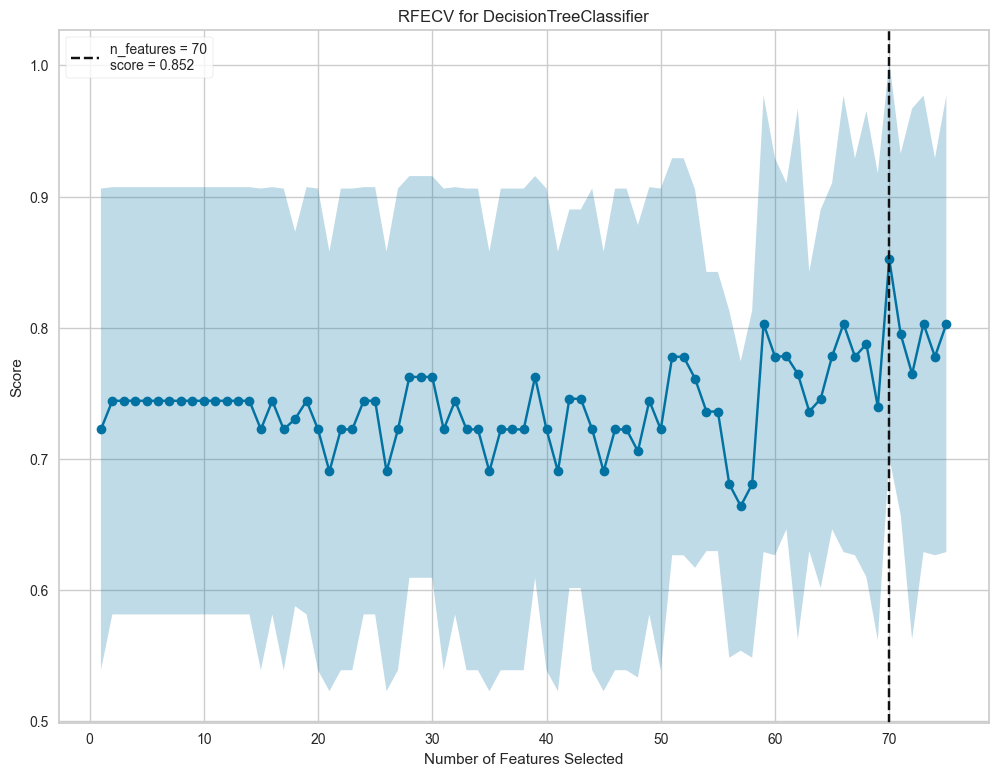

Index(['glide ligand efficiency ln', 'glide gscore', 'glide lipo',
       'glide hbond', 'glide rewards', 'glide evdw', 'glide ecoul',
       'glide erotb', 'glide esite', 'glide emodel', 'glide energy',
       'glide einternal', 'res:A132 vdw', 'res:A132 coul', 'res:A132 hbond',
       'res:A132 dist', 'res:A132 Eint', 'res:A117 vdw', 'res:A117 coul',
       'res:A117 hbond', 'res:A117 dist', 'res:A117 Eint', 'res:A113 vdw',
       'res:A113 coul', 'res:A113 hbond', 'res:A113 dist', 'res:A113 Eint',
       'res:A82 vdw', 'res:A82 coul', 'res:A82 hbond', 'res:A82 dist',
       'res:A82 Eint', 'res:A42 vdw', 'res:A42 coul', 'res:A42 dist',
       'res:A42 Eint', 'res:A16 vdw', 'res:A16 coul', 'res:A16 hbond',
       'res:A16 dist', 'res:A16 Eint', 'A:113(ASP) HDonor nn',
       'A:113(ASP) HDonor nc', 'A:113(ASP) HDonor cc', 'A:113(ASP) Salt',
       'A:118(PHE) HDonor nc', 'A:119(GLY) HDonor nc', 'A:121(ASP) HDonor cn',
       'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 251, in fit
    return self._fit(X, y, **fit_params)
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 302, in _fit
    importances = _get_feature_importances(
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_base.py", line 208, in _get_feature_importances
    raise ValueError(
ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


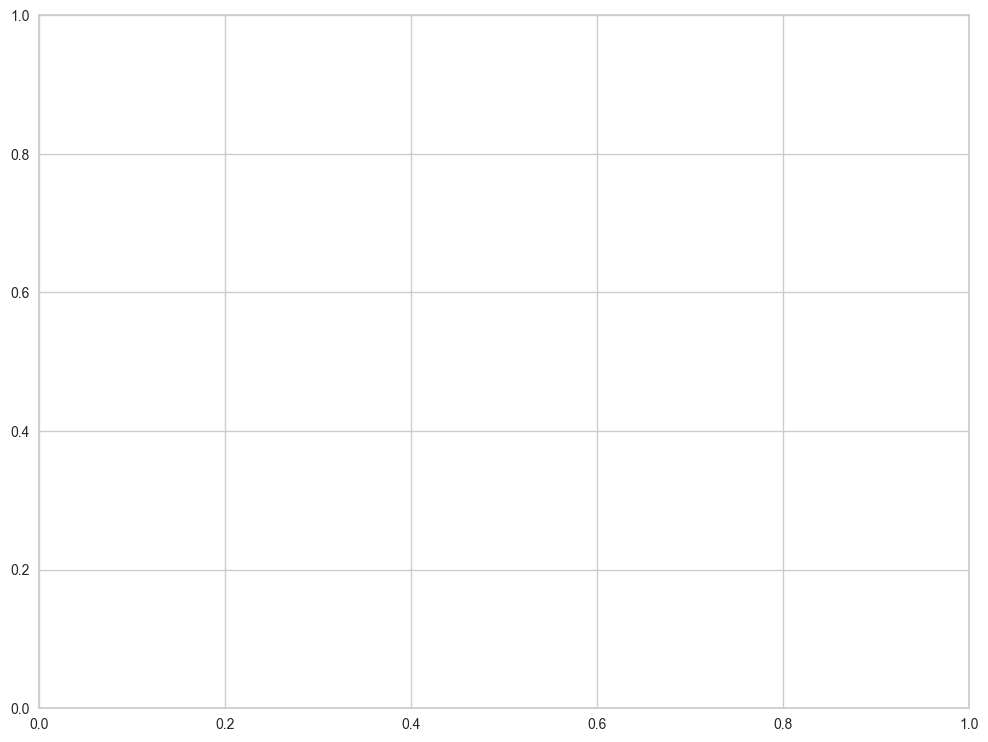

In [393]:
for name, model in models:
    cv = StratifiedKFold(5)
    visualizer = RFECV(model, cv=cv, scoring='f1_weighted')
    visualizer.fit(X_class, Y_class) 
    print(name)
    visualizer.show()

    selected_features_mask = visualizer.get_support()
    selected_features = X_class.columns[selected_features_mask]
    print(selected_features)    

In [89]:
selected_features_mask = visualizer.get_support()
selected_features_mask

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['glide hbond', 'glide rewards', 'glide esite', 'res:A132 hbond',
       'res:A132 dist', 'res:A16 coul', 'res:A16 hbond', 'res:A16 Eint'],
      dtype='object')

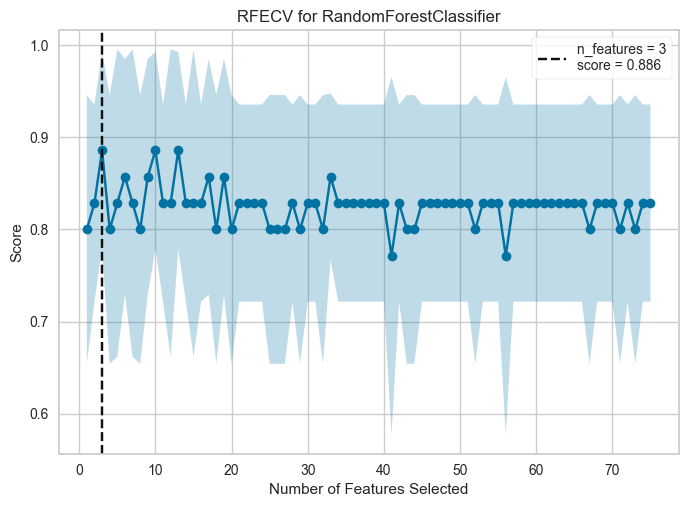

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [45]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='accuracy')

visualizer.fit(X_class, Y_class)
visualizer.show()   

In [70]:
selected_features_mask = visualizer.get_support()
selected_features_mask

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['glide esite', 'res:A132 hbond', 'res:A132 dist'], dtype='object')

# Feature selection techniques
## Variance threshold

In [48]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [303]:
# Calculate the variance of each feature
X_class.var(axis=0)

glide rotatable bonds         1.029412
docking score                 1.029412
glide ligand efficiency       1.029412
glide ligand efficiency sa    1.029412
glide ligand efficiency ln    1.029412
                                ...   
A:82(ARG) Salt                0.104202
Charge_+ - -                  0.164706
Charge_-                      0.252101
Charge_- -                    0.126050
Charge_±                      0.181513
Length: 75, dtype: float64

In [304]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_class = scaler.fit_transform(X_class)

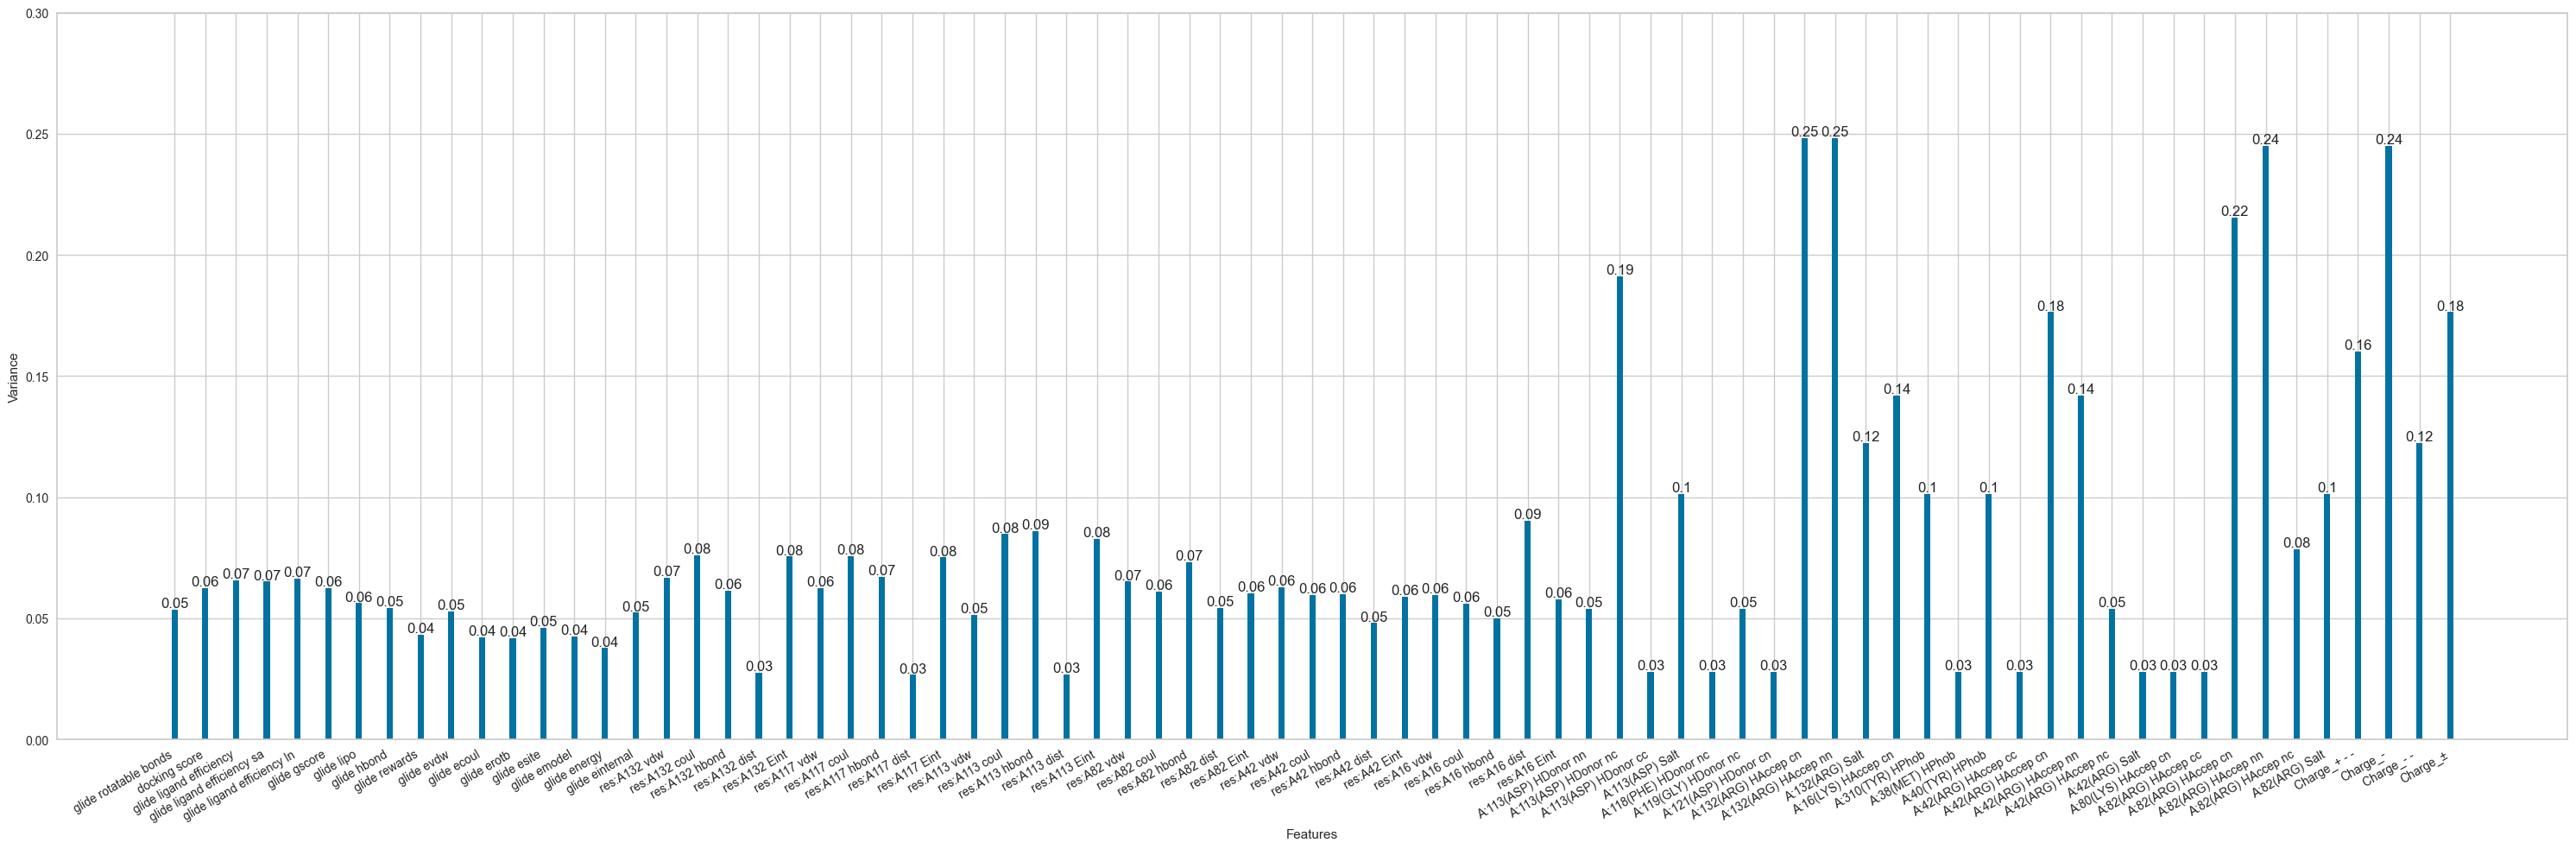

In [305]:
fig, ax = plt.subplots(figsize = (30,10))

x = X_class.columns 
y = scaled_X_class.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.3)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 2)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [387]:
d = {'Feature': X_class.columns .tolist() ,'Variance': scaled_X_class.var(axis=0).tolist()}
Feature_Variance = pd.DataFrame(d)

important_features = Feature_Variance[Feature_Variance['Variance'] >= 0.1]
variance_features = important_features['Feature'].tolist()
variance_features

['A:113(ASP) HDonor nc',
 'A:113(ASP) Salt',
 'A:132(ARG) HAccep cn',
 'A:132(ARG) HAccep nn',
 'A:132(ARG) Salt',
 'A:16(LYS) HAccep cn',
 'A:310(TYR) HPhob',
 'A:40(TYR) HPhob',
 'A:42(ARG) HAccep cn',
 'A:42(ARG) HAccep nn',
 'A:82(ARG) HAccep cn',
 'A:82(ARG) HAccep nn',
 'A:82(ARG) Salt',
 'Charge_+ - -',
 'Charge_-',
 'Charge_- - ',
 'Charge_±']

In [389]:
X_fea = X_class[variance_features]

In [390]:
from sklearn.model_selection import StratifiedKFold

skff = StratifiedKFold(n_splits=5)
skff.get_n_splits(X_fea, Y_class)

5

In [391]:
for name, model in models:
    print(name)
    #"roc_auc", "f1", "precision", "recall", "accuracy", 
    for score in ['f1_weighted', 'accuracy', 'roc_auc', 'f1']:
        cvs = cross_val_score(model, X_fea, Y_class, scoring=score, cv=skf)
        
        print(score + " : "+ str(cvs) + "  " + 'Average :', round(np.average(cvs), 5))
       
    print('\n')

Random Forest
f1_weighted : [1.         1.         0.62857143 0.79120879 0.5952381 ]  Average : 0.803
accuracy : [1.         1.         0.57142857 0.85714286 0.71428571]  Average : 0.82857
roc_auc : [1.         1.         1.         0.66666667 0.4       ]  Average : 0.81333
f1 : [1.  1.  0.4 0.  0. ]  Average : 0.48


Decision Tree
f1_weighted : [1.         0.62337662 0.47619048 0.79120879 0.5952381 ]  Average : 0.6972
accuracy : [1.         0.57142857 0.42857143 0.85714286 0.71428571]  Average : 0.71429
roc_auc : [1.         0.33333333 0.66666667 0.5        0.5       ]  Average : 0.6
f1 : [1.         0.         0.33333333 0.         0.        ]  Average : 0.26667


KNeighbors
f1_weighted : [1.         1.         0.87445887 0.79120879 0.51948052]  Average : 0.83703
accuracy : [1.         1.         0.85714286 0.85714286 0.57142857]  Average : 0.85714
roc_auc : [1.         1.         1.         0.91666667 0.4       ]  Average : 0.86333
f1 : [1.         1.         0.66666667 0.         0

In [392]:
for name, model in models:
    print(name)
    # Variables for average classification report
    originalclass = []
    predictedclass = []

    #Make our customer score
    def classification_report_with_accuracy_score(y_true, y_pred):
        originalclass.extend(y_true)
        predictedclass.extend(y_pred)
        return accuracy_score(y_true, y_pred) # return accuracy score


    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X=X_fea, y=Y_class, cv=skff, scoring=make_scorer(classification_report_with_accuracy_score))

    # Average values in classification report for all folds in a K-fold Cross-validation  
    print(classification_report(originalclass, predictedclass)) 

Random Forest
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.50      0.50      0.50         6

    accuracy                           0.83        35
   macro avg       0.70      0.70      0.70        35
weighted avg       0.83      0.83      0.83        35

Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.25      0.33      0.29         6

    accuracy                           0.71        35
   macro avg       0.55      0.56      0.55        35
weighted avg       0.75      0.71      0.73        35

KNeighbors
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.60      0.50      0.55         6

    accuracy                           0.86        35
   macro avg       0.75      0.72      0.73        35
weighted avg       0.85      0.86  

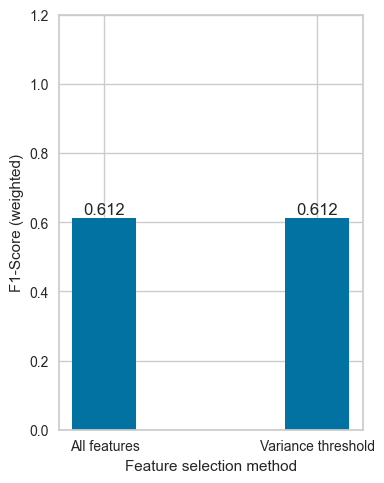

In [134]:
fig, ax = plt.subplots(figsize = (4,5))

x = ['All features', 'Variance threshold']
y = [f1_score_all, f1_score_var]

ax.bar(x, y, width=0.3)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01, s=str(round(value,3)), ha='center')
    
plt.tight_layout()

In [147]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_train[variance_features], y_train, cv=3)
print(score_rf)
print('Avg :', np.average(score_rf))

[0.75  0.875 0.875]
Avg : 0.8333333333333334


In [148]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_test[variance_features], y_test, cv=3)
print(score_rf)
print('Avg :', np.average(score_rf))

[1.  0.5 1. ]
Avg : 0.8333333333333334


In [149]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_train, y_train, cv=3)
print(score_rf)
print('Avg :', np.average(score_rf))

[0.875 1.    0.875]
Avg : 0.9166666666666666


In [152]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_test, y_test, cv=6)
print(score_rf)
print('Avg :', np.average(score_rf))

C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(


[1.  1.  0.5 0.5 1.  1. ]
Avg : 0.8333333333333334


## K-best features 

In [54]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1, 75):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds, average='weighted'), 2)
    
    f1_score_list.append(f1_score_kbest)

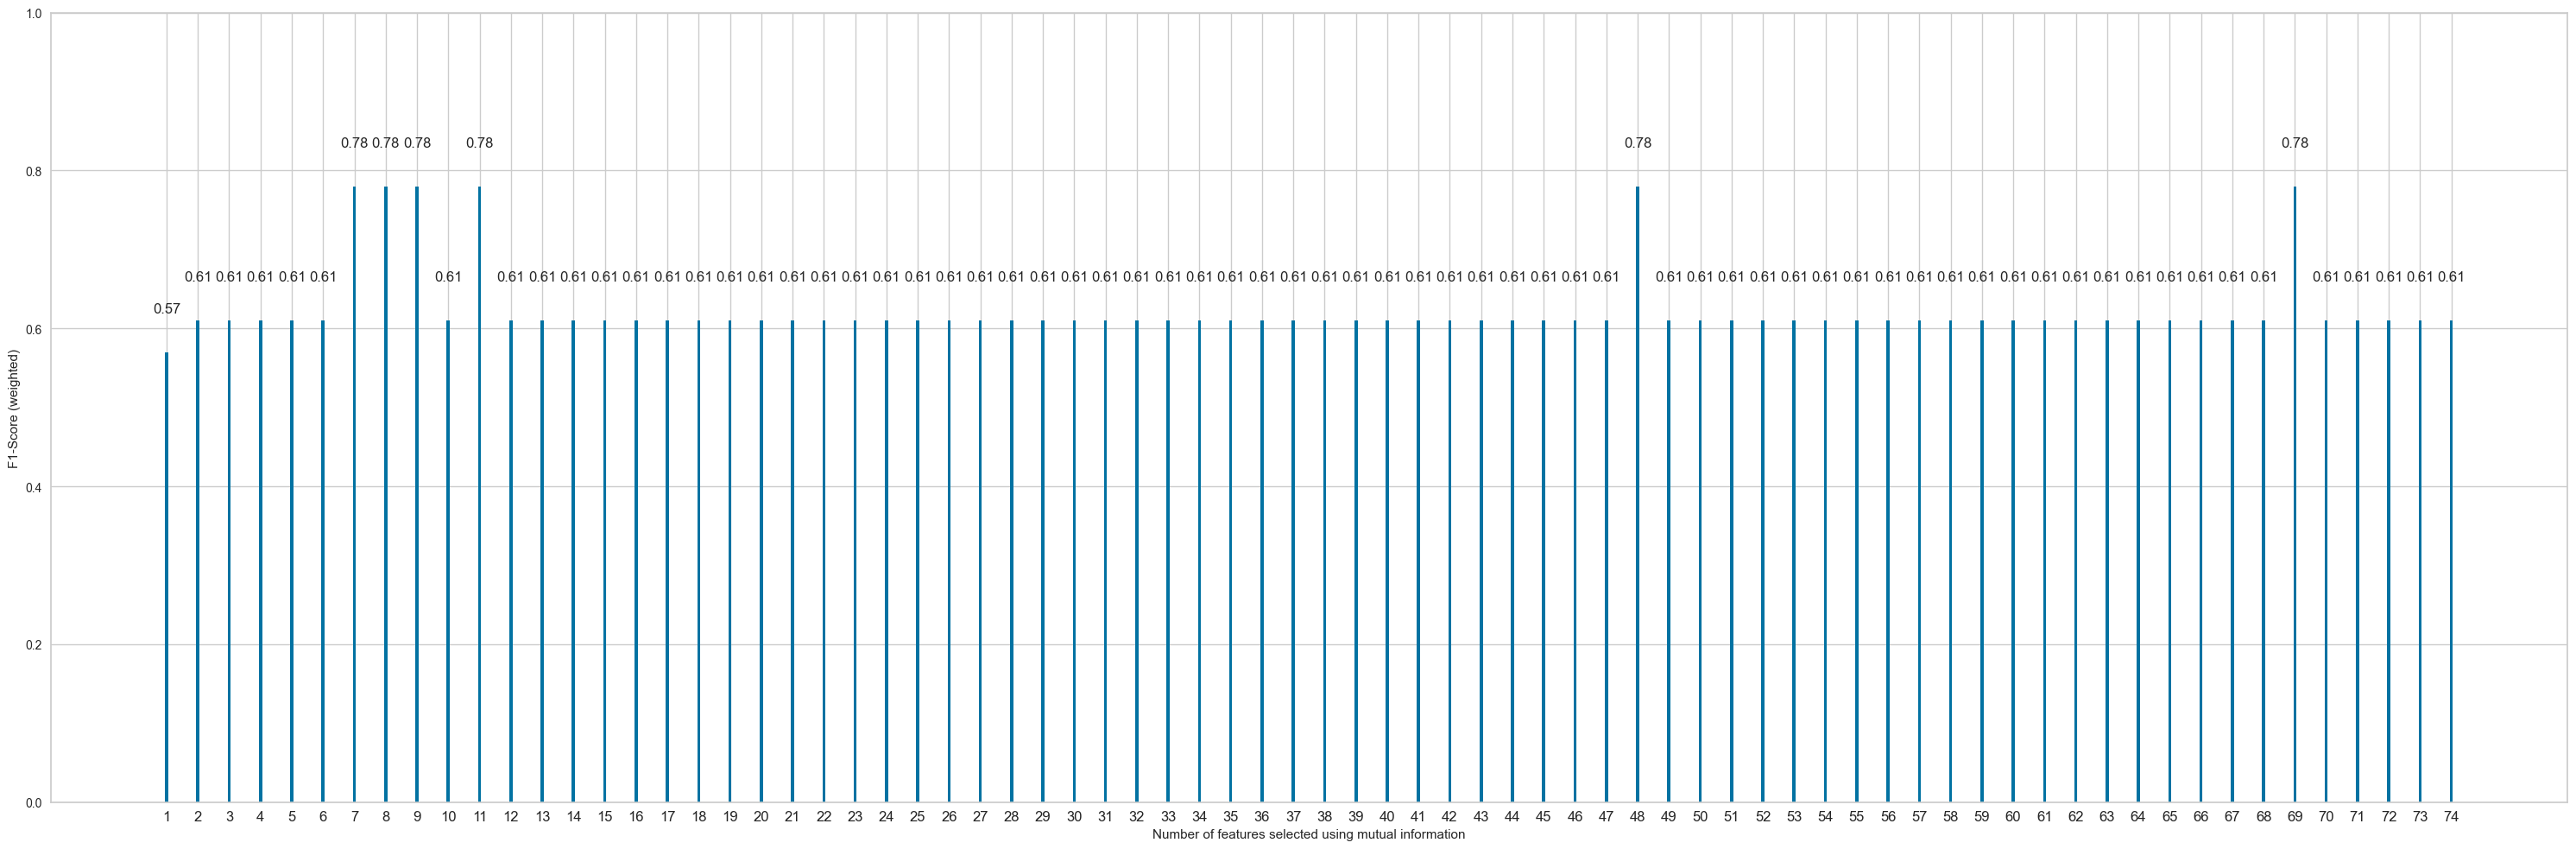

In [56]:
fig, ax = plt.subplots(figsize = (30,10))

x = np.arange(1, 75)
y = f1_score_list

ax.bar(x, y, width=0.1)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.0)
ax.set_xticks(np.arange(1, 75))
ax.set_xticklabels(np.arange(1, 75), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [57]:
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['glide rotatable bonds', 'glide rewards', 'glide evdw', 'glide erotb',
       'glide esite', 'res:A132 hbond', 'res:A132 dist', 'res:A16 hbond',
       'res:A16 dist', 'A:80(LYS) HAccep cn'],
      dtype='object')

## Boruta 

In [58]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [59]:
from boruta import BorutaPy

boruta_selector = BorutaPy(gbc, random_state=42)

boruta_selector.fit(X_train_v4, y_train_v4)

sel_X_train_v4 = boruta_selector.transform(X_train_v4.values)
sel_X_test_v4 = boruta_selector.transform(X_test_v4.values)

gbc.fit(sel_X_train_v4, y_train_v4)

boruta_preds = gbc.predict(sel_X_test_v4)

boruta_f1_score = round(f1_score(y_test_v4, boruta_preds, average='weighted'), 3)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features

Index(['malic_acid', 'ash', 'magnesium', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

NameError: name 'f1_score_var' is not defined

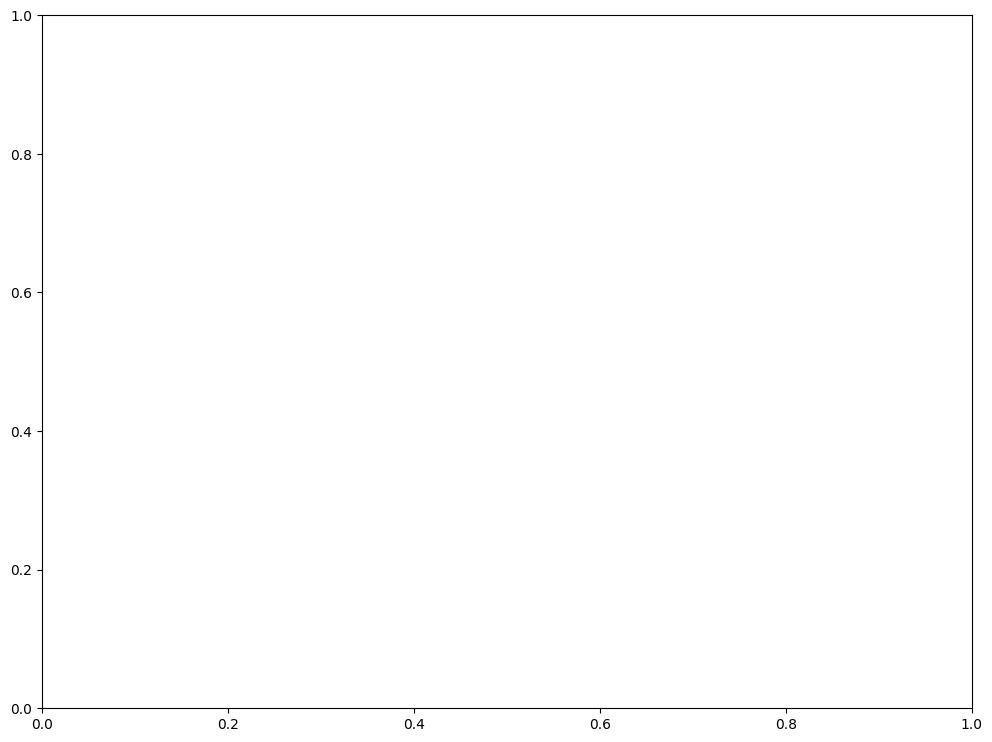

In [ ]:
fig, ax = plt.subplots()

x = ['All features (13)', 'Variance threshold (11)', 'Filter - MI (3)', 'RFE (3)', 'Boruta (9)']
y = [f1_score_all, f1_score_var, 0.981, 1.0, boruta_f1_score]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')
    
plt.tight_layout()